<a href="https://colab.research.google.com/github/Pankaj-2003/LLMS-GPT/blob/main/trigram_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
words = open('names.txt', 'r').read().splitlines()

In [ ]:
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [ ]:
b = {}
for w in words[:1]:  # Iterate over the first word in the list
  chs = ['.'] + list(w) + ['.']
  print(chs)
  for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
    trigram = (ch1, ch2, ch3)
    print(trigram)
    b[trigram] = b.get(trigram, 0) + 1

['.', 'e', 'm', 'm', 'a', '.']
('.', 'e', 'm')
('e', 'm', 'm')
('m', 'm', 'a')
('m', 'a', '.')


In [ ]:
import torch
import matplotlib.pyplot as plt

In [ ]:
N = torch.zeros((27, 27 , 27), dtype=torch.int32)

In [ ]:
chars = sorted(list(set(''.join(words))))
print(chars)
stoi = {s:i+1 for i,s in enumerate(chars)}
# print(stoi)
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [ ]:
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    ix3 = stoi[ch3]
    N[ix1, ix2 , ix3] += 1

In [ ]:
N[0]

tensor([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0],
        [   0,  414,  380,   62,  732,  110,   42,   34,  182,  308,   54,  150,
         1264,  768, 1246,   20,   34,   18,  964,  388,  144,  304,  486,   12,
           54,  346,  304],
        [   0,  338,    0,    0,    0,  506,    0,    0,   18,   82,    2,    0,
          170,    0,    0,  154,    0,    0, 1292,    0,    0,   42,    0,    0,
            0,    8,    0],
        [   0, 1256,    0,    0,    0,  130,    0,    0,  704,   88,    4,    0,
          136,    0,    0,  510,    0,    0,  134,    0,    0,   26,    0,    0,
            0,   92,    4],
        [   0, 1400,    0,    0,    0, 1048,    0,    0,   64,  260,   12,    4,
            4,   38,    6,  238,    0,    0,  154,    2,    0,   70,    6,   12,
            0,   62,    0],
        [   0,   46,   30,    8,  160,   18,   20,

In [ ]:
words[:2]

['emma', 'olivia']

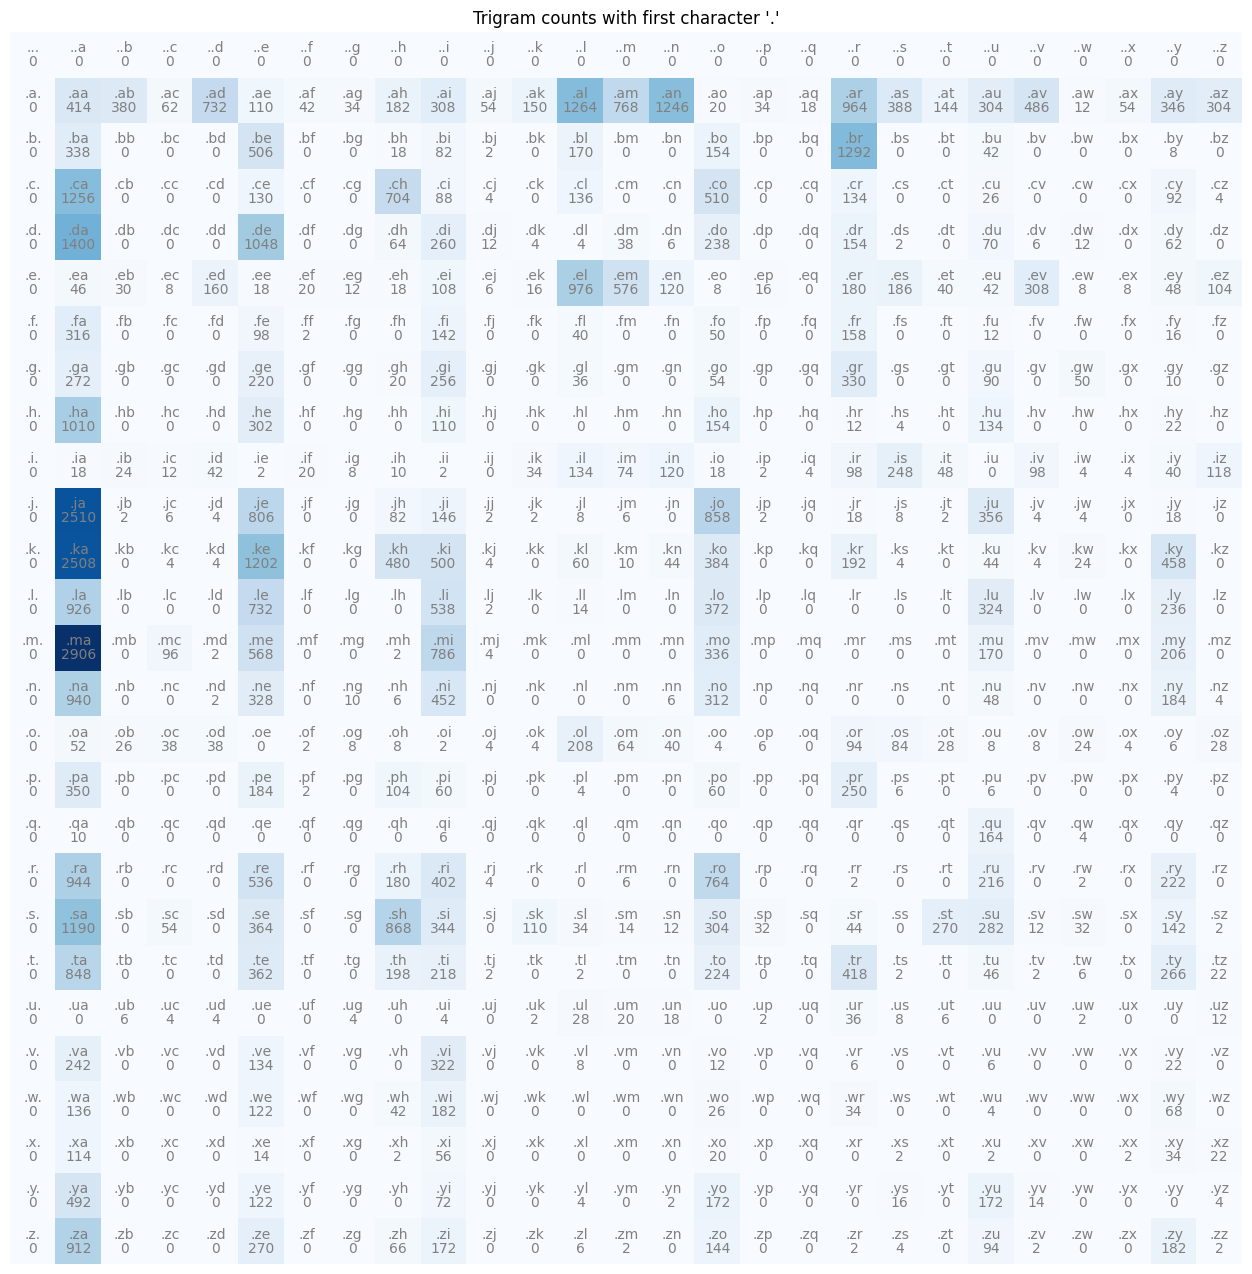

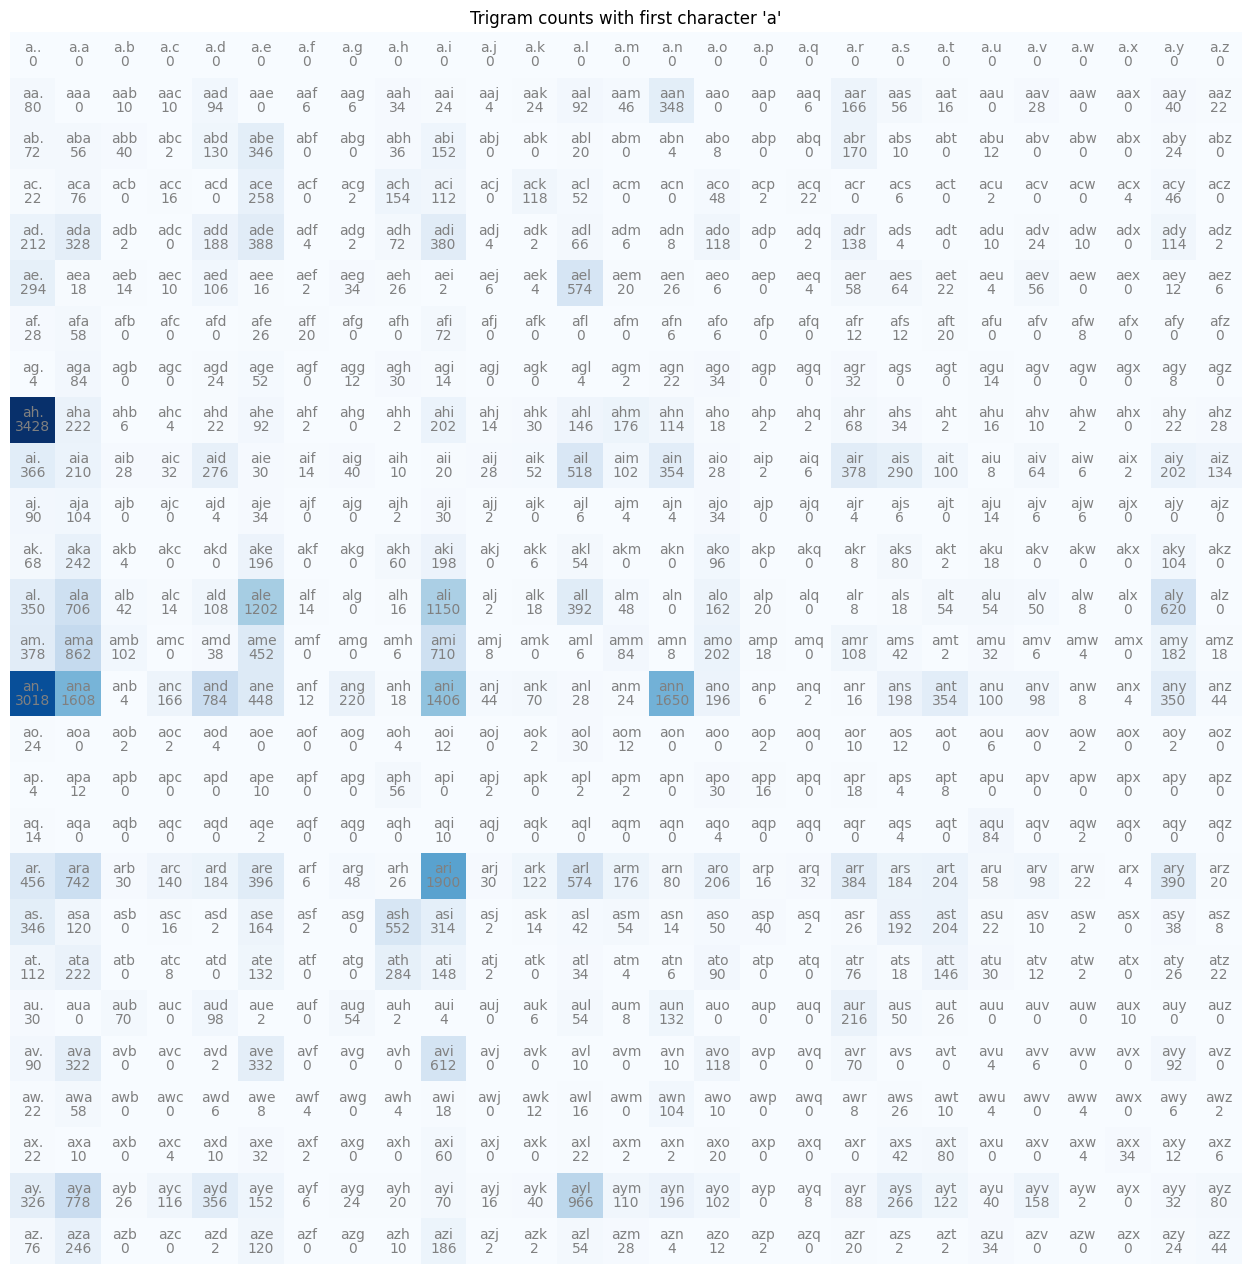

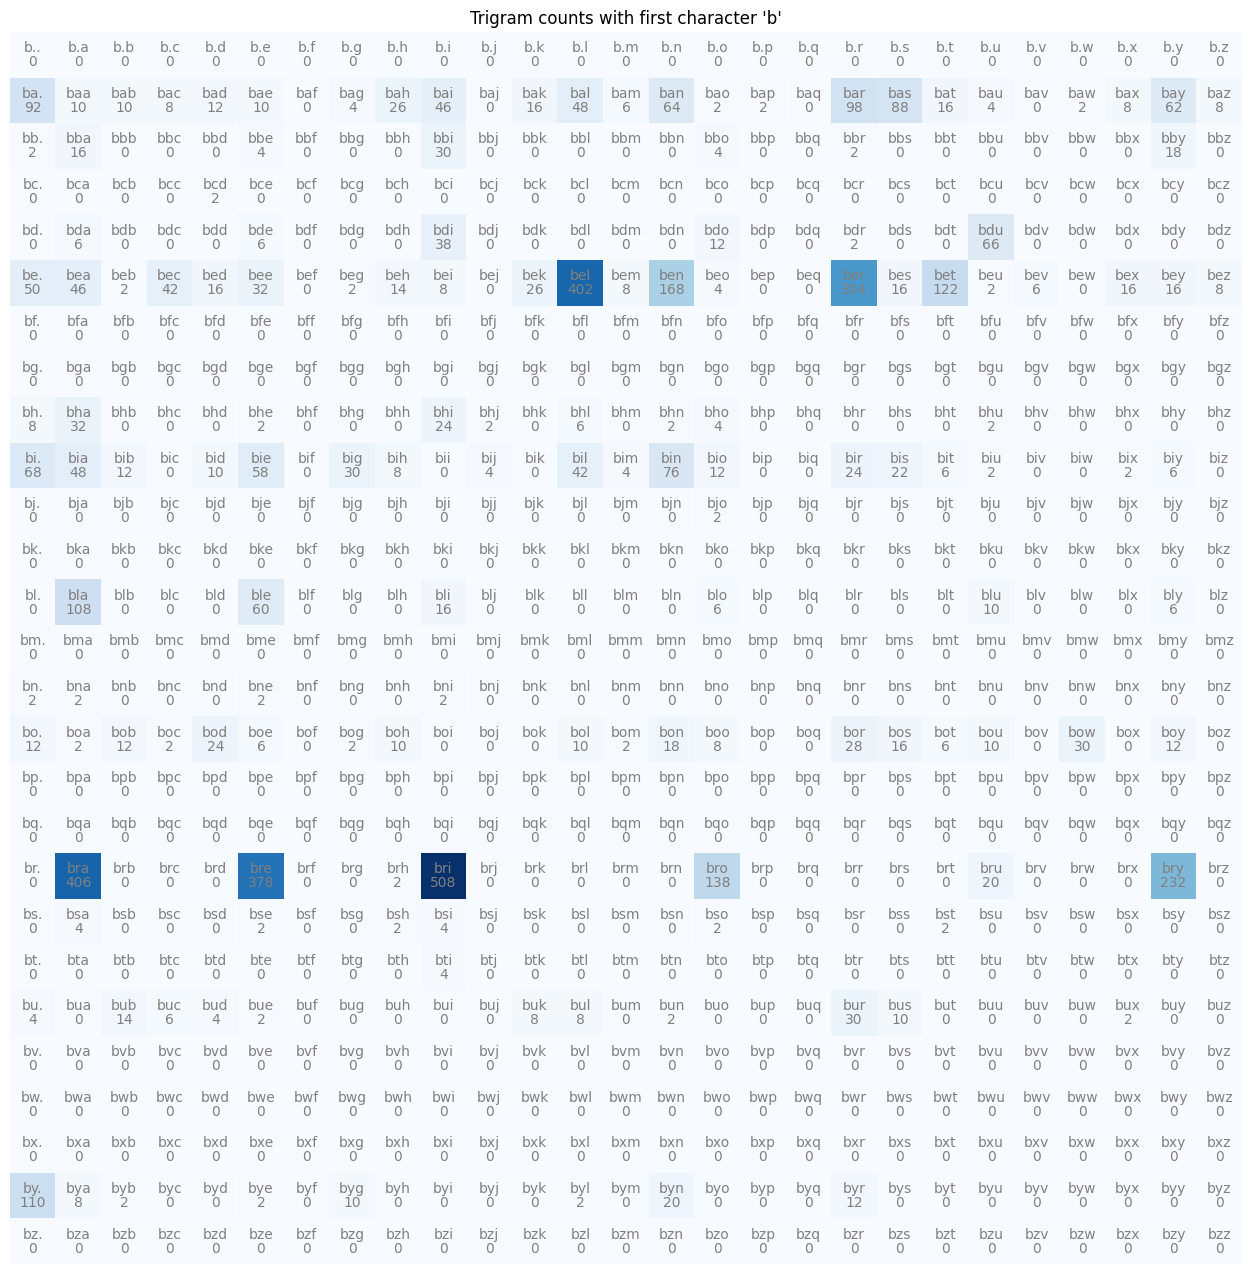

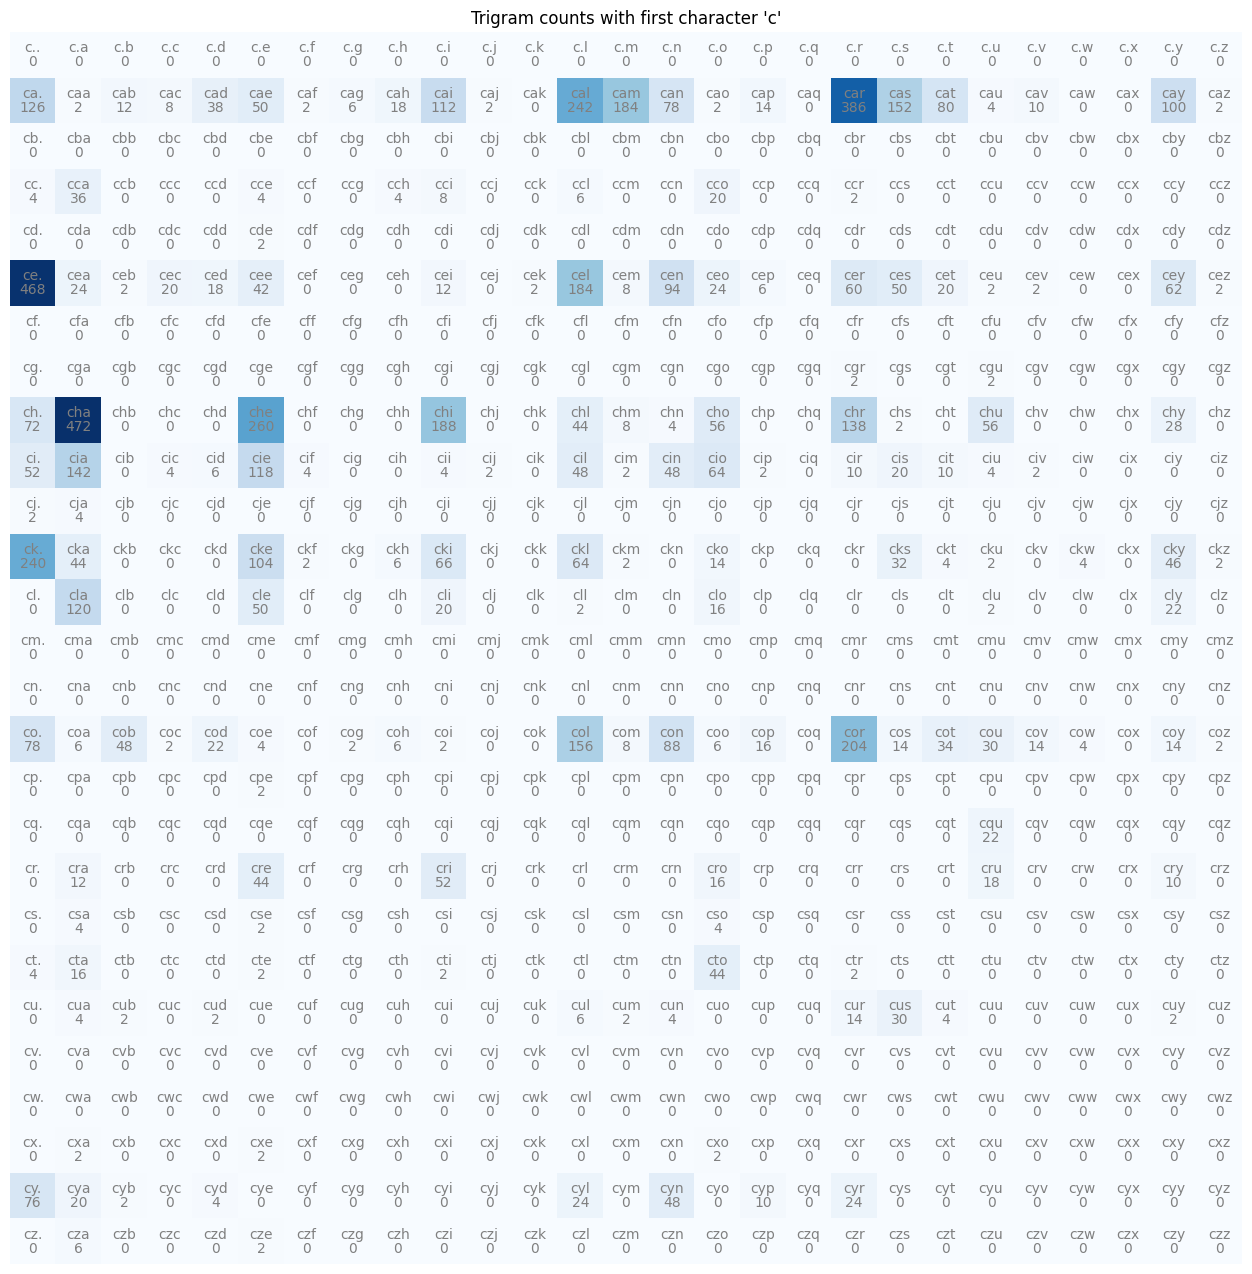

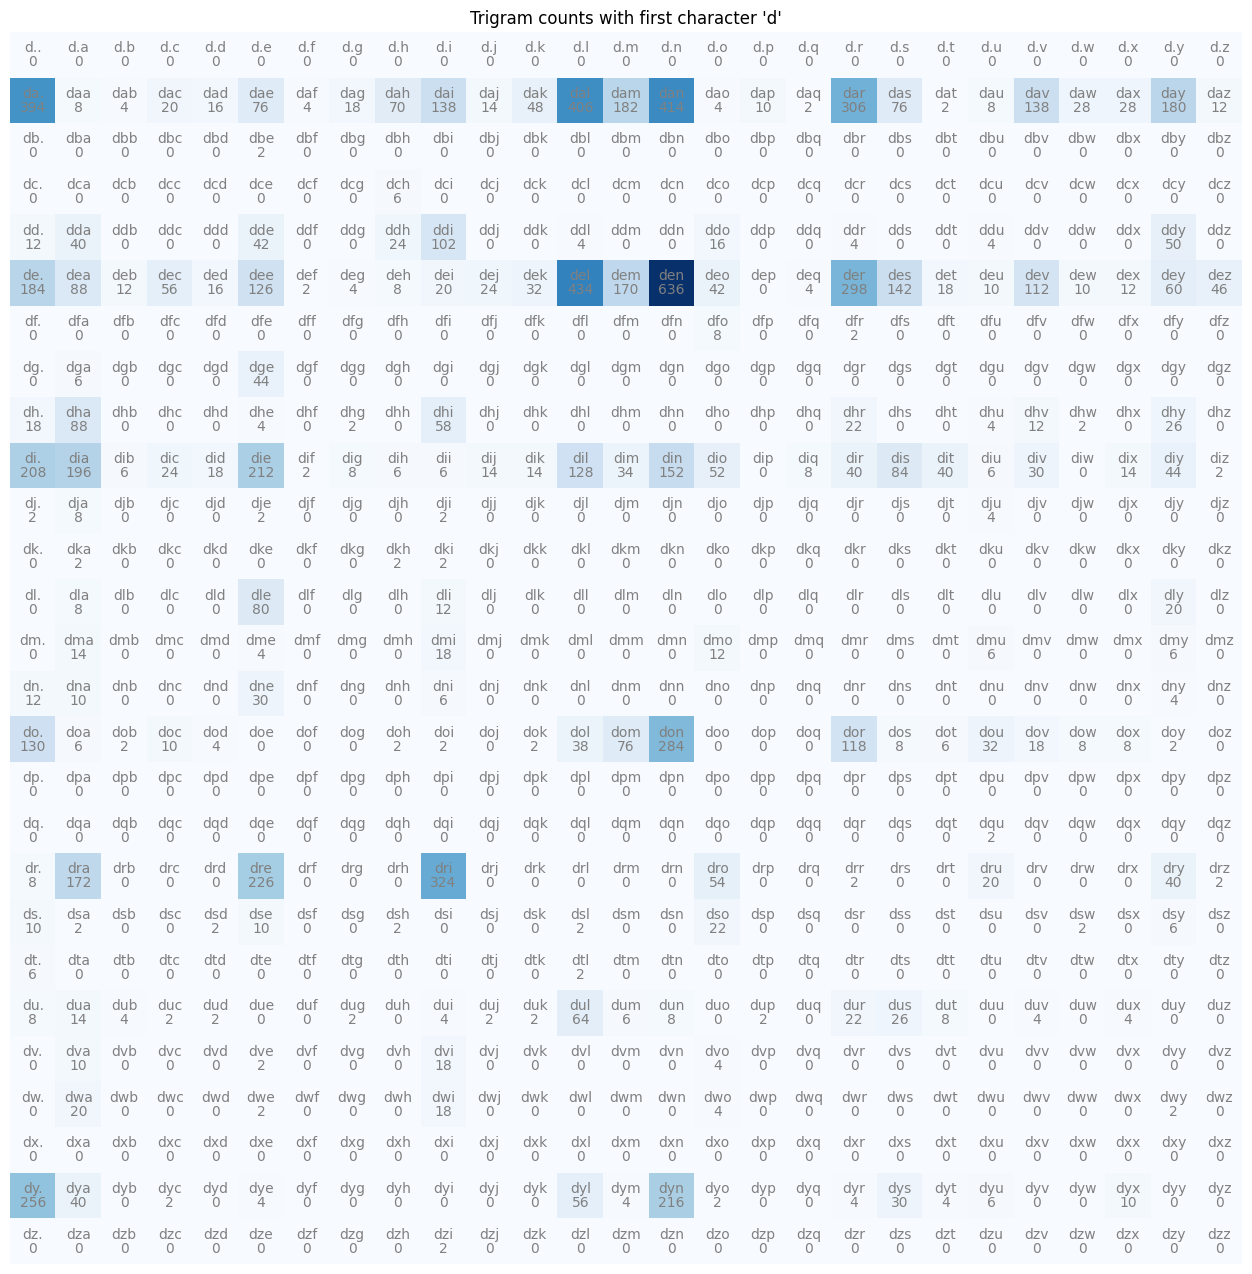

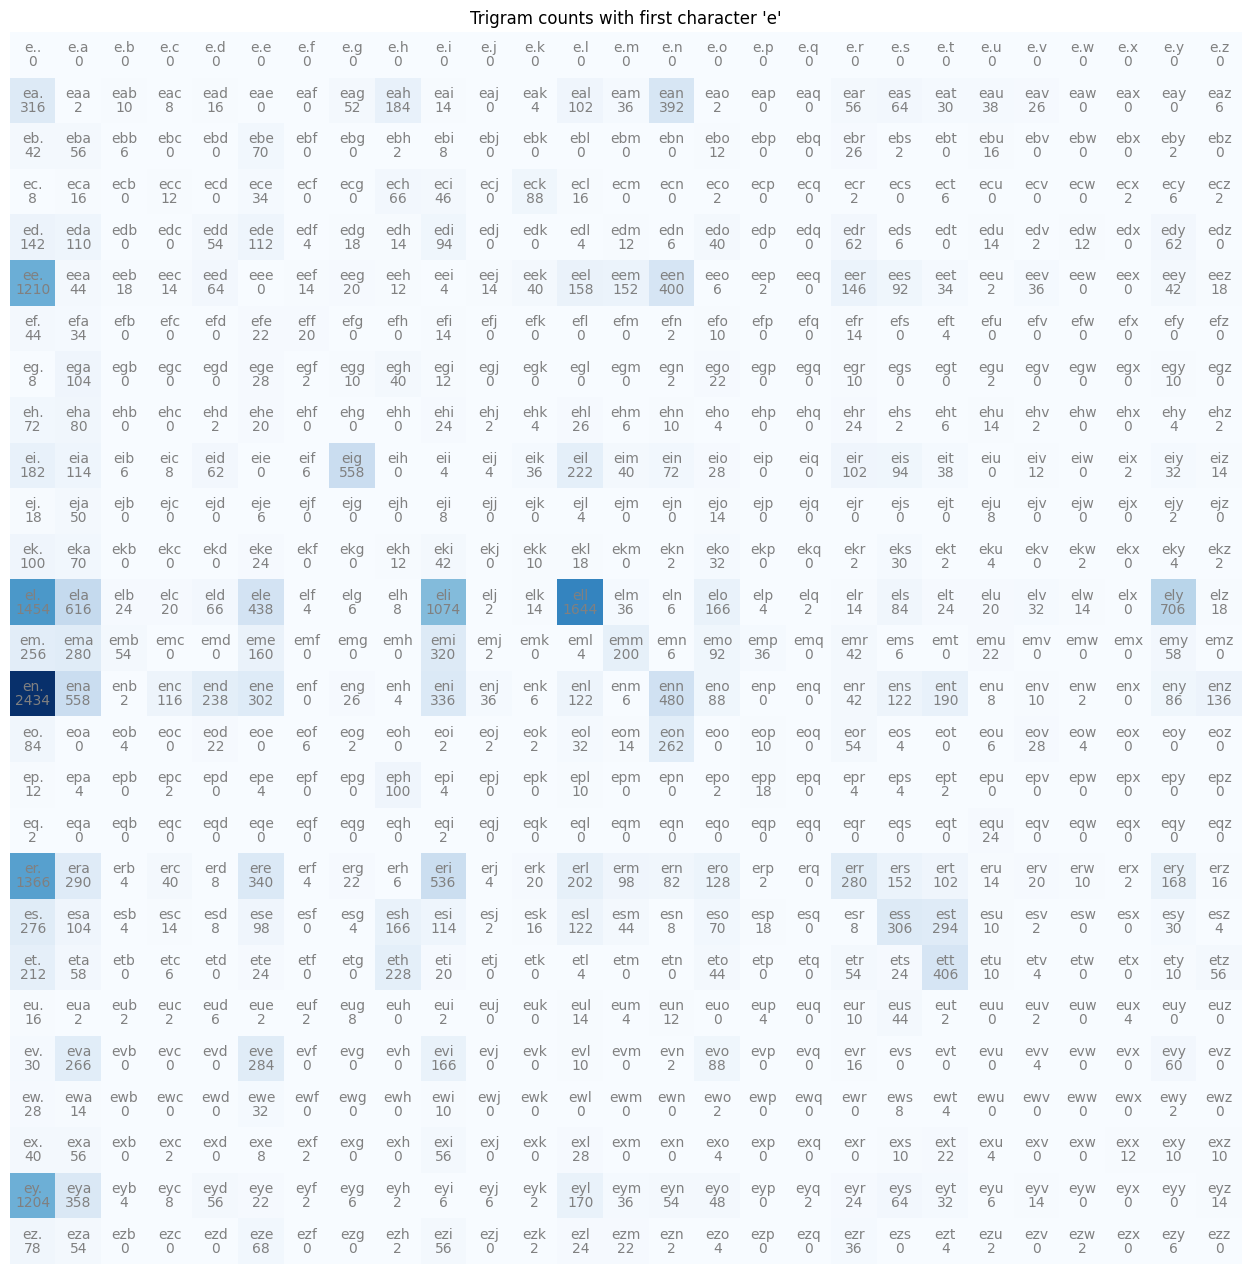

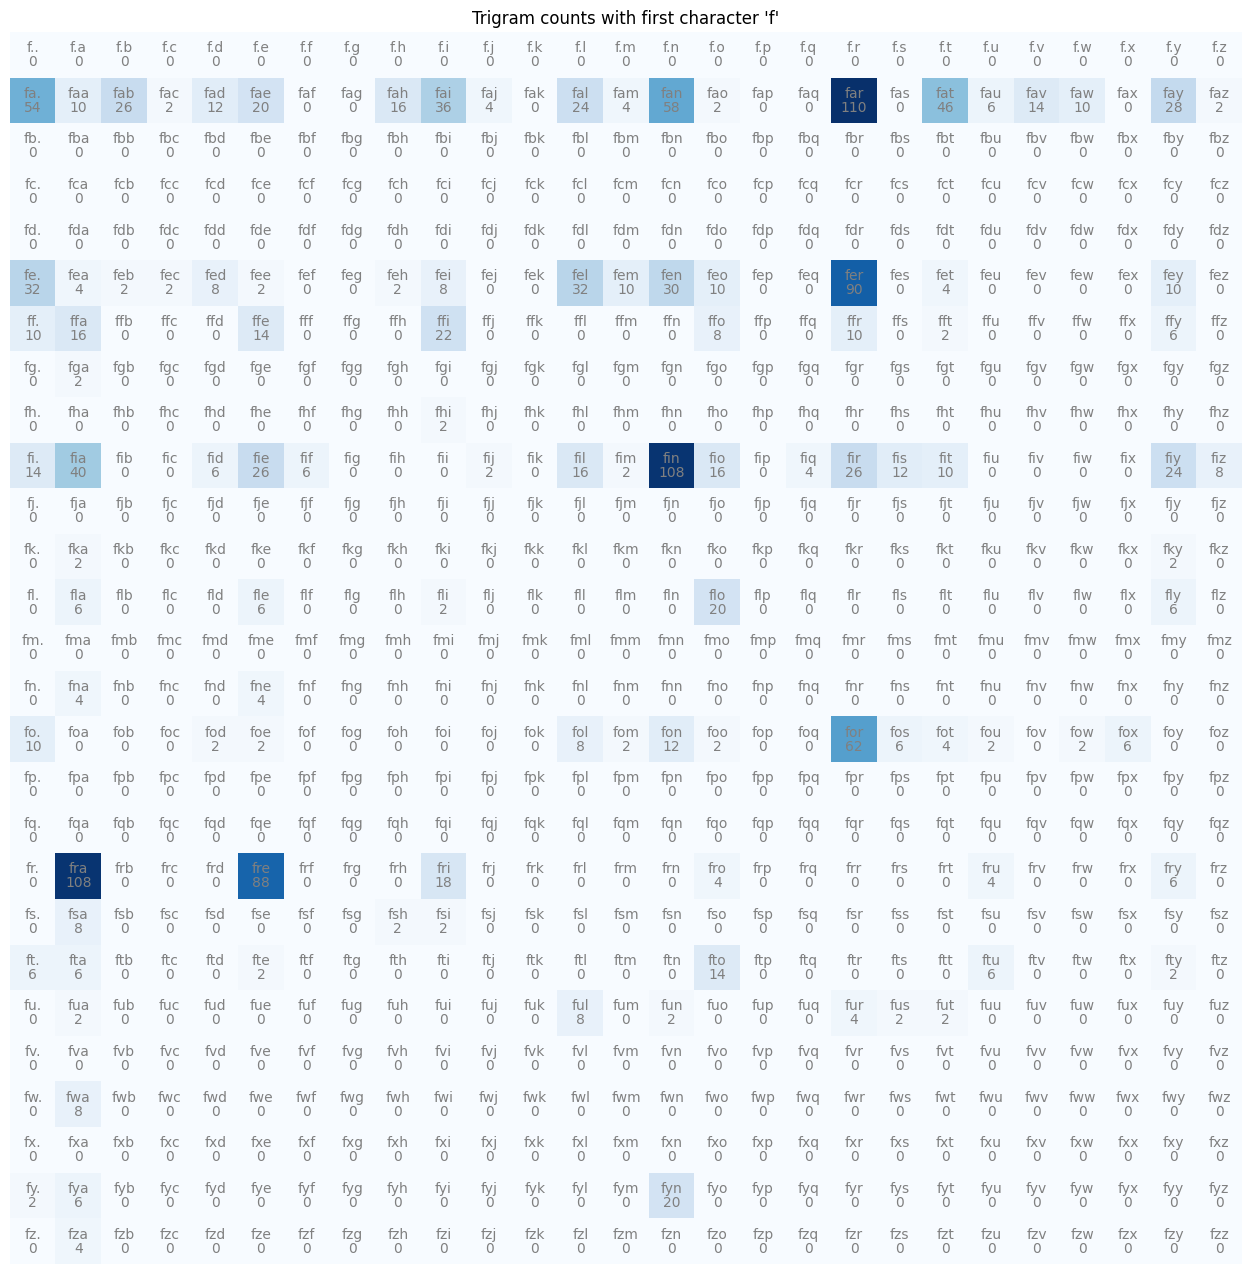

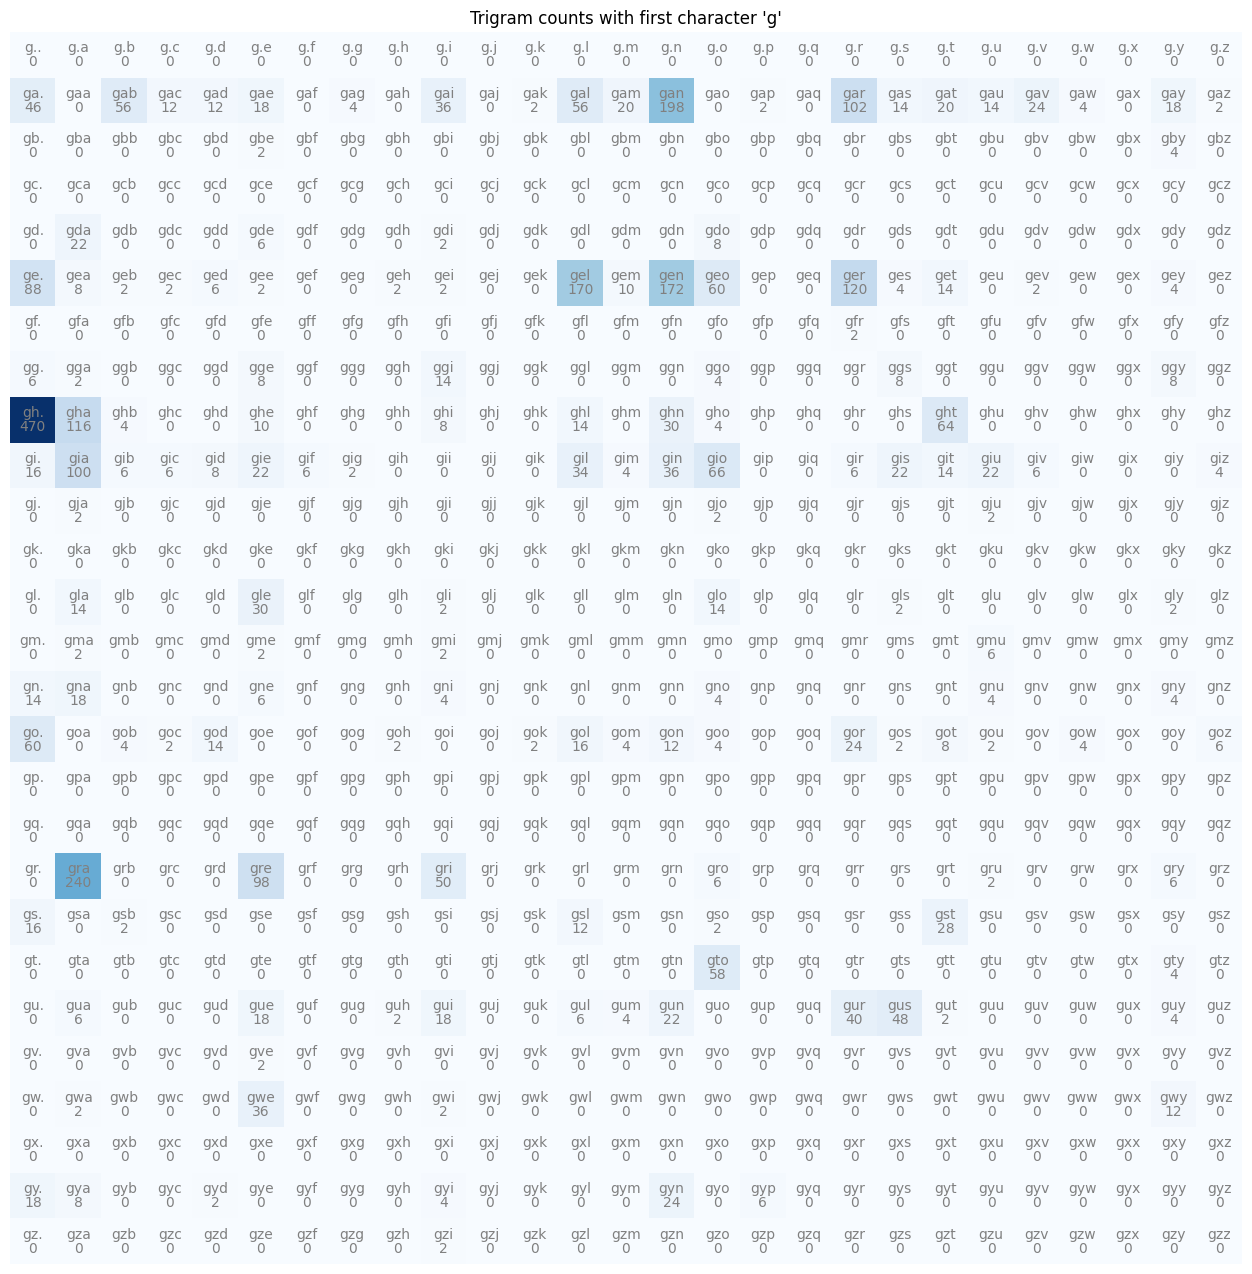

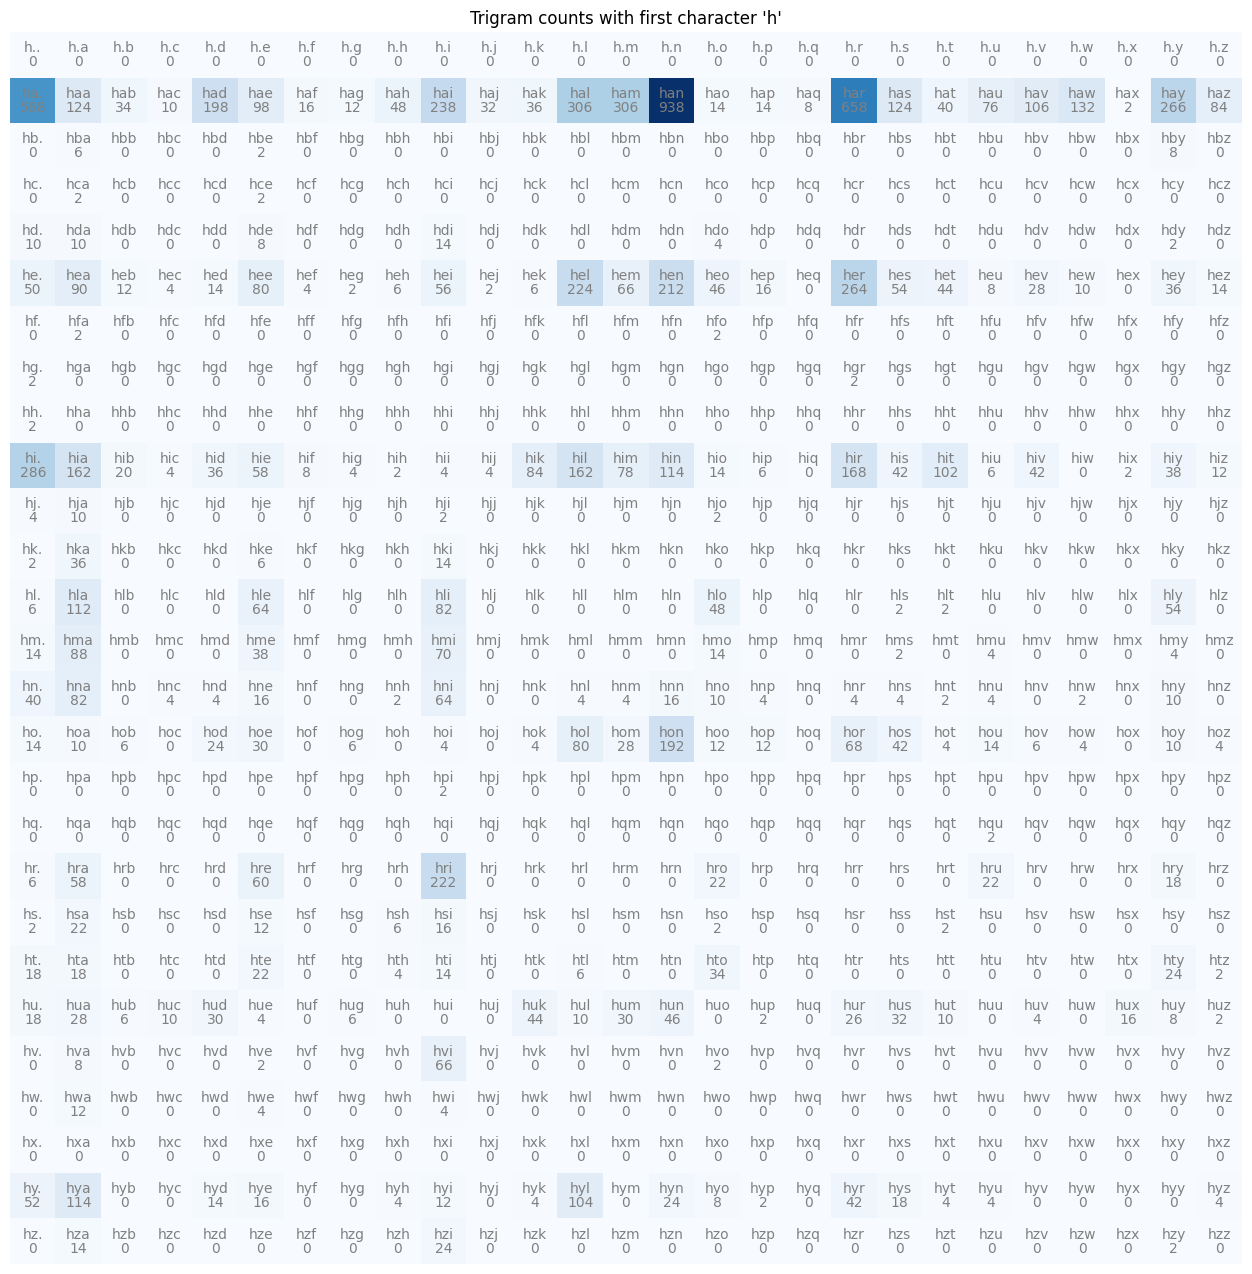

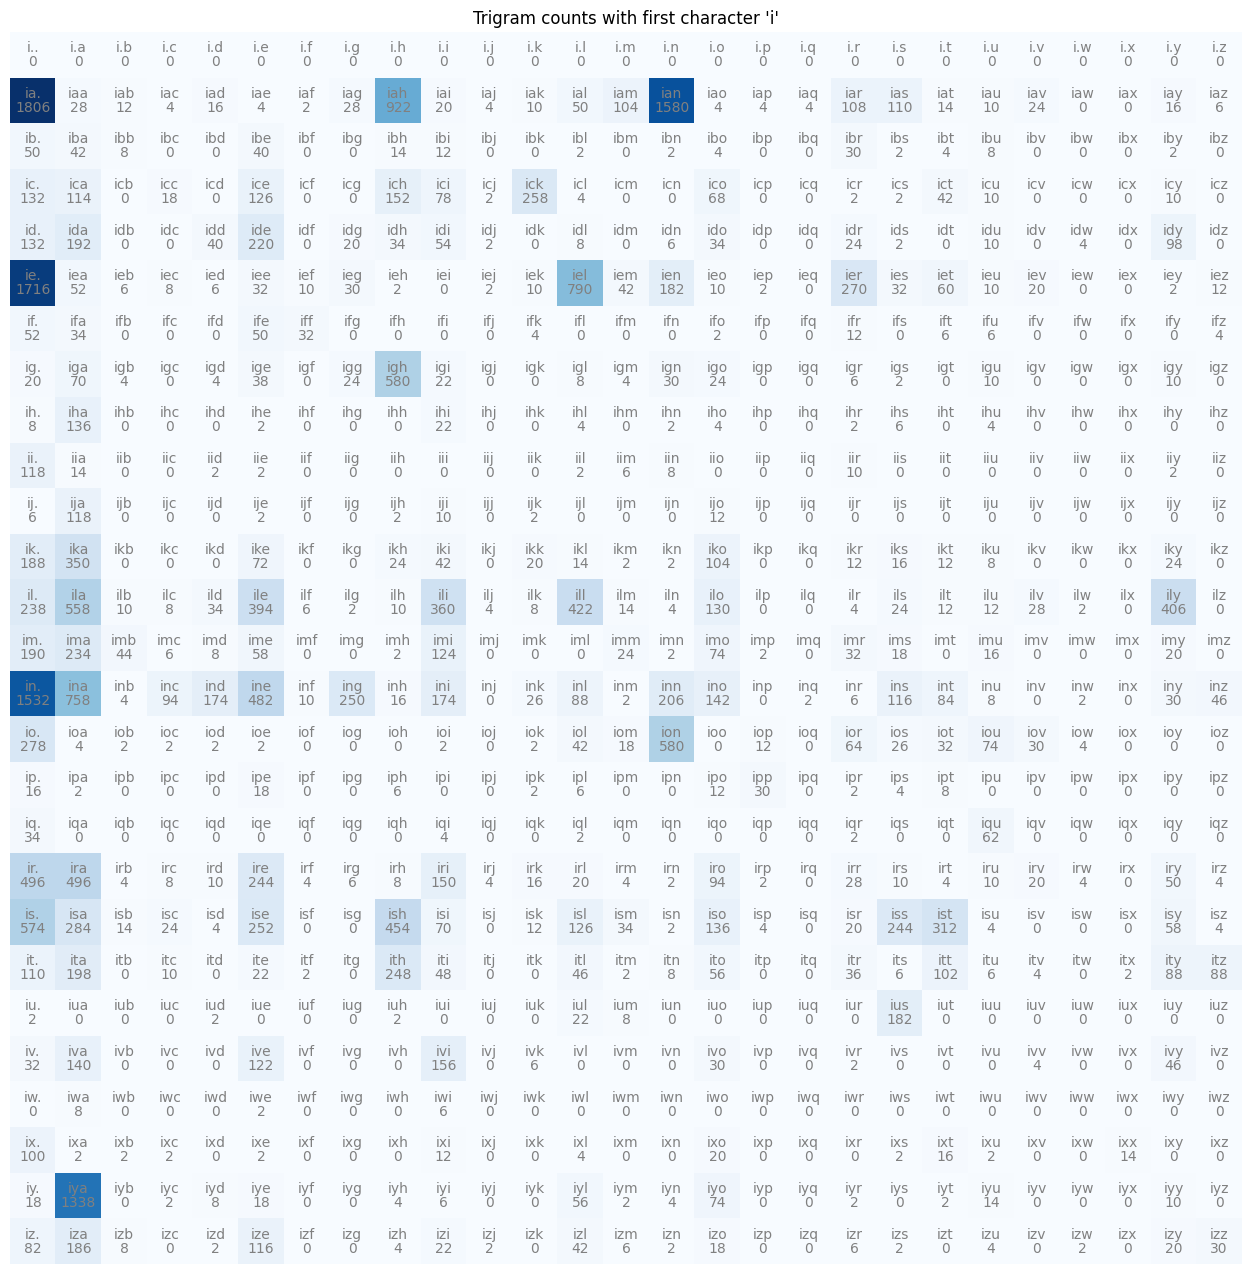

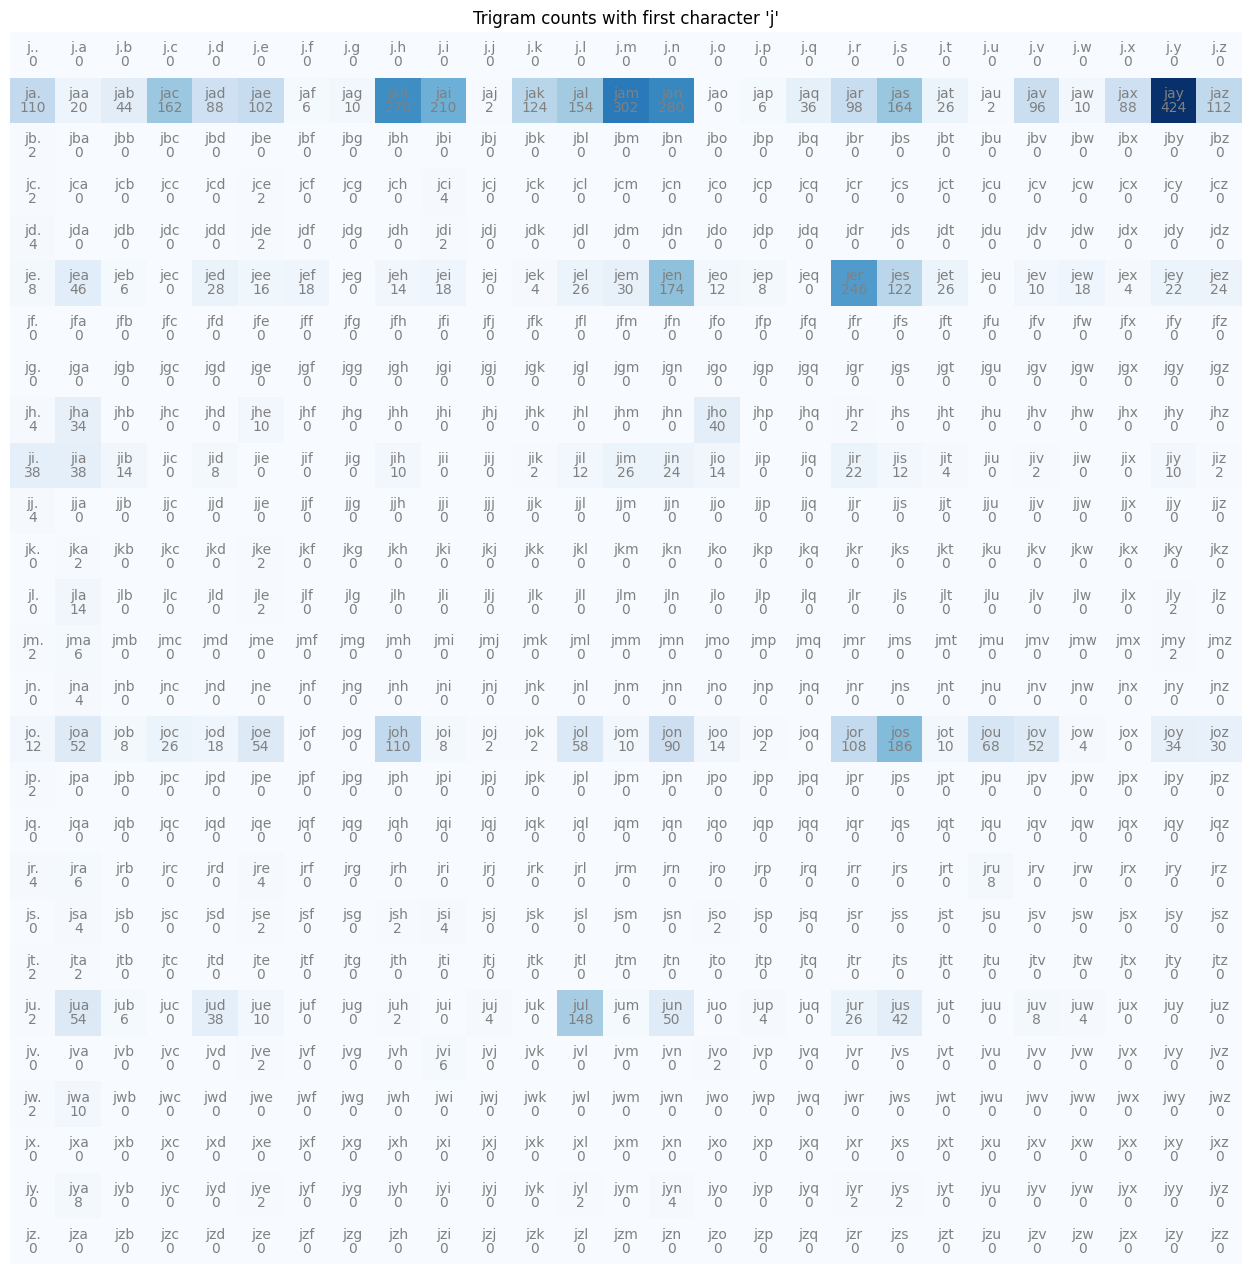

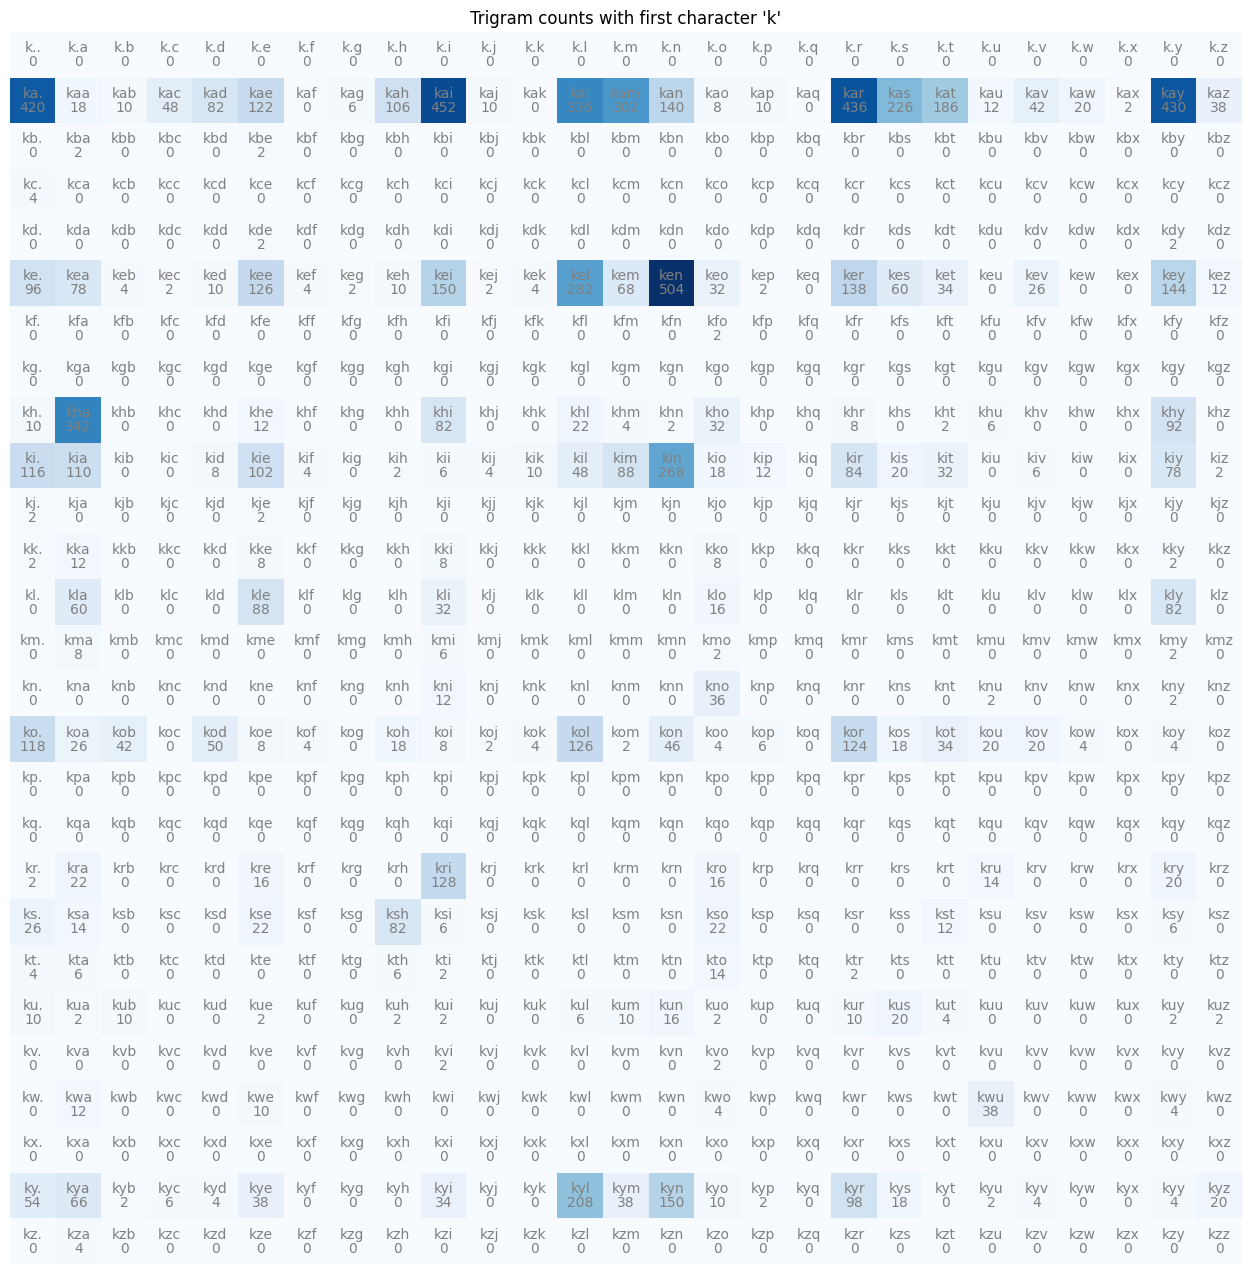

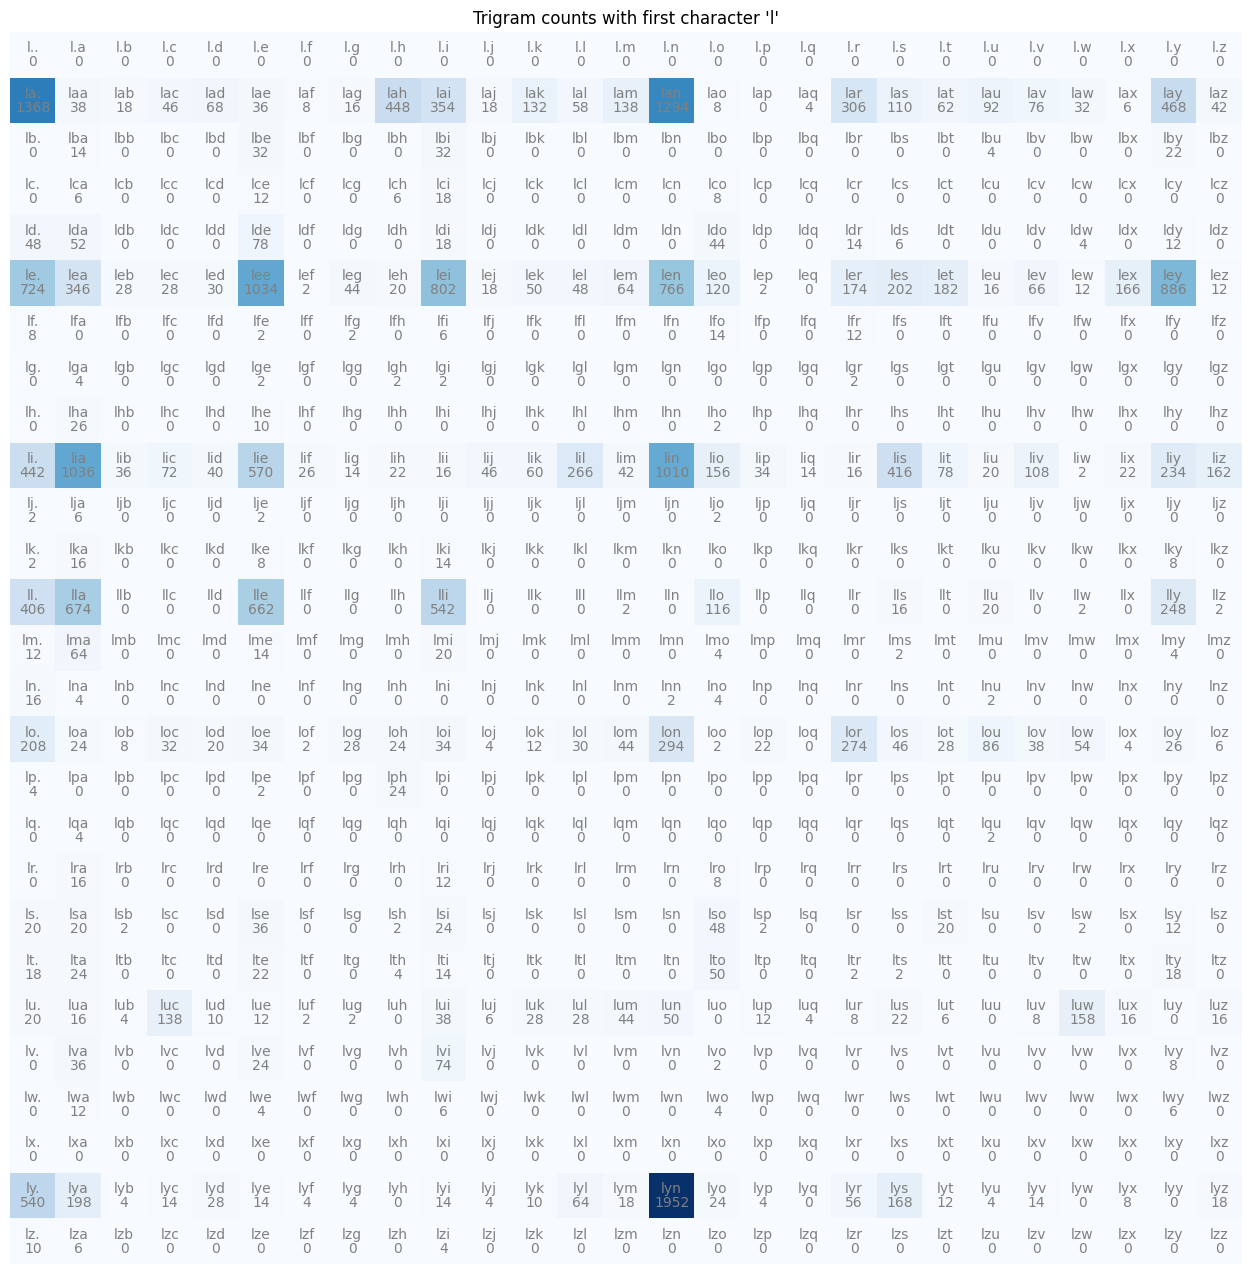

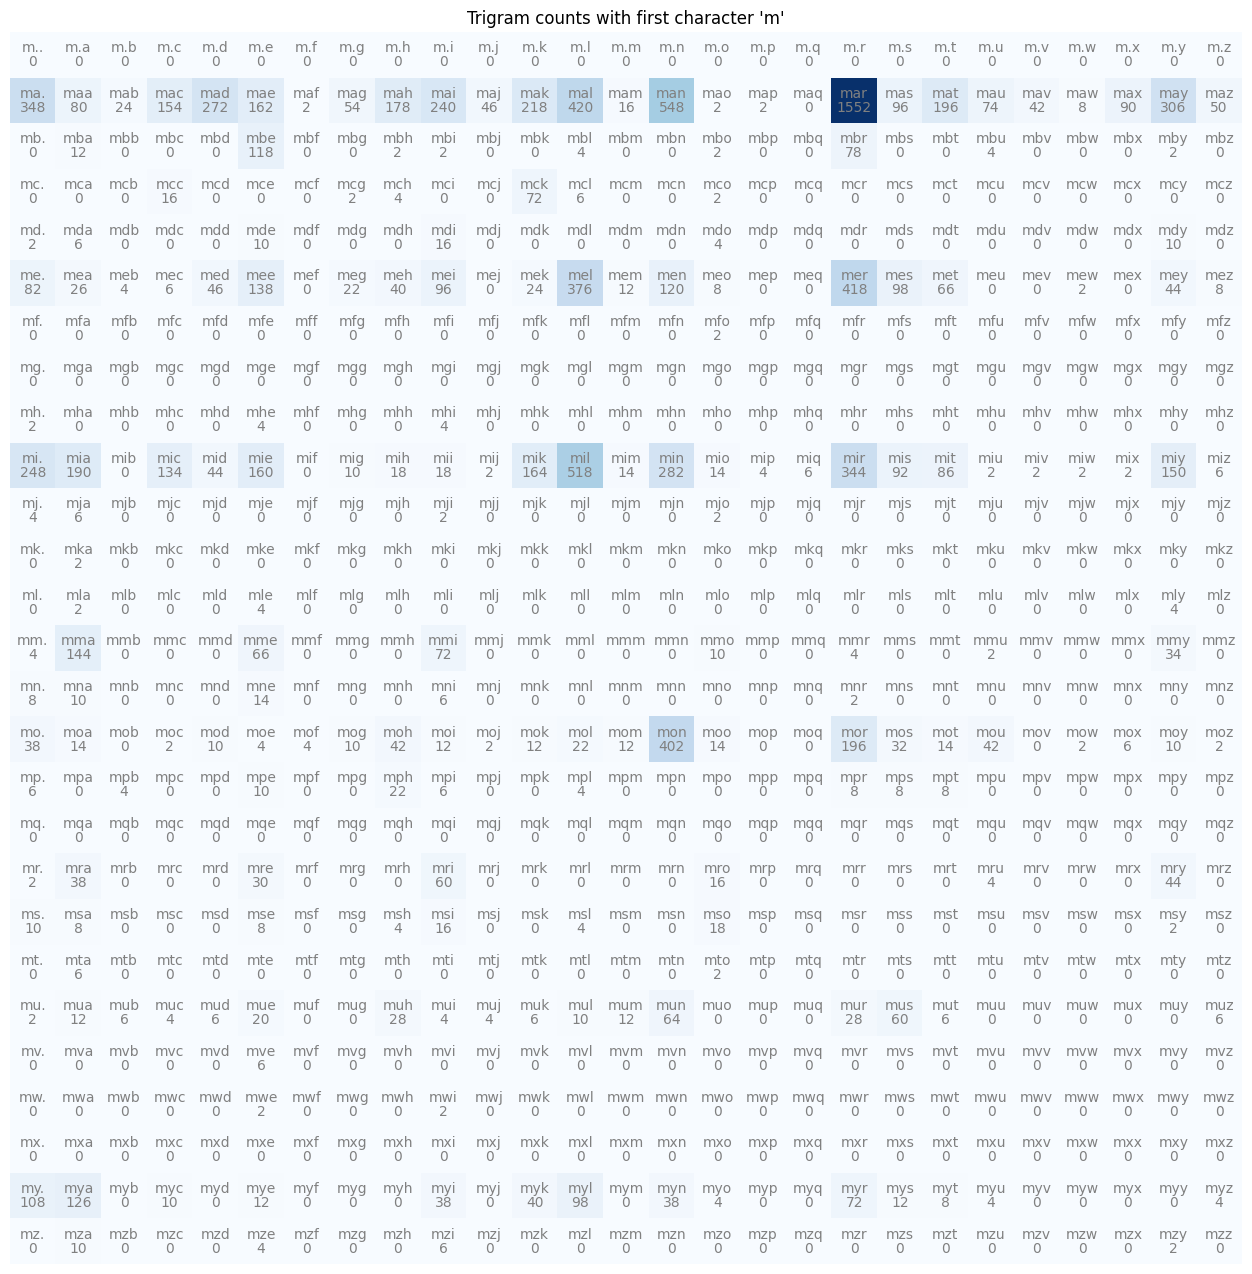

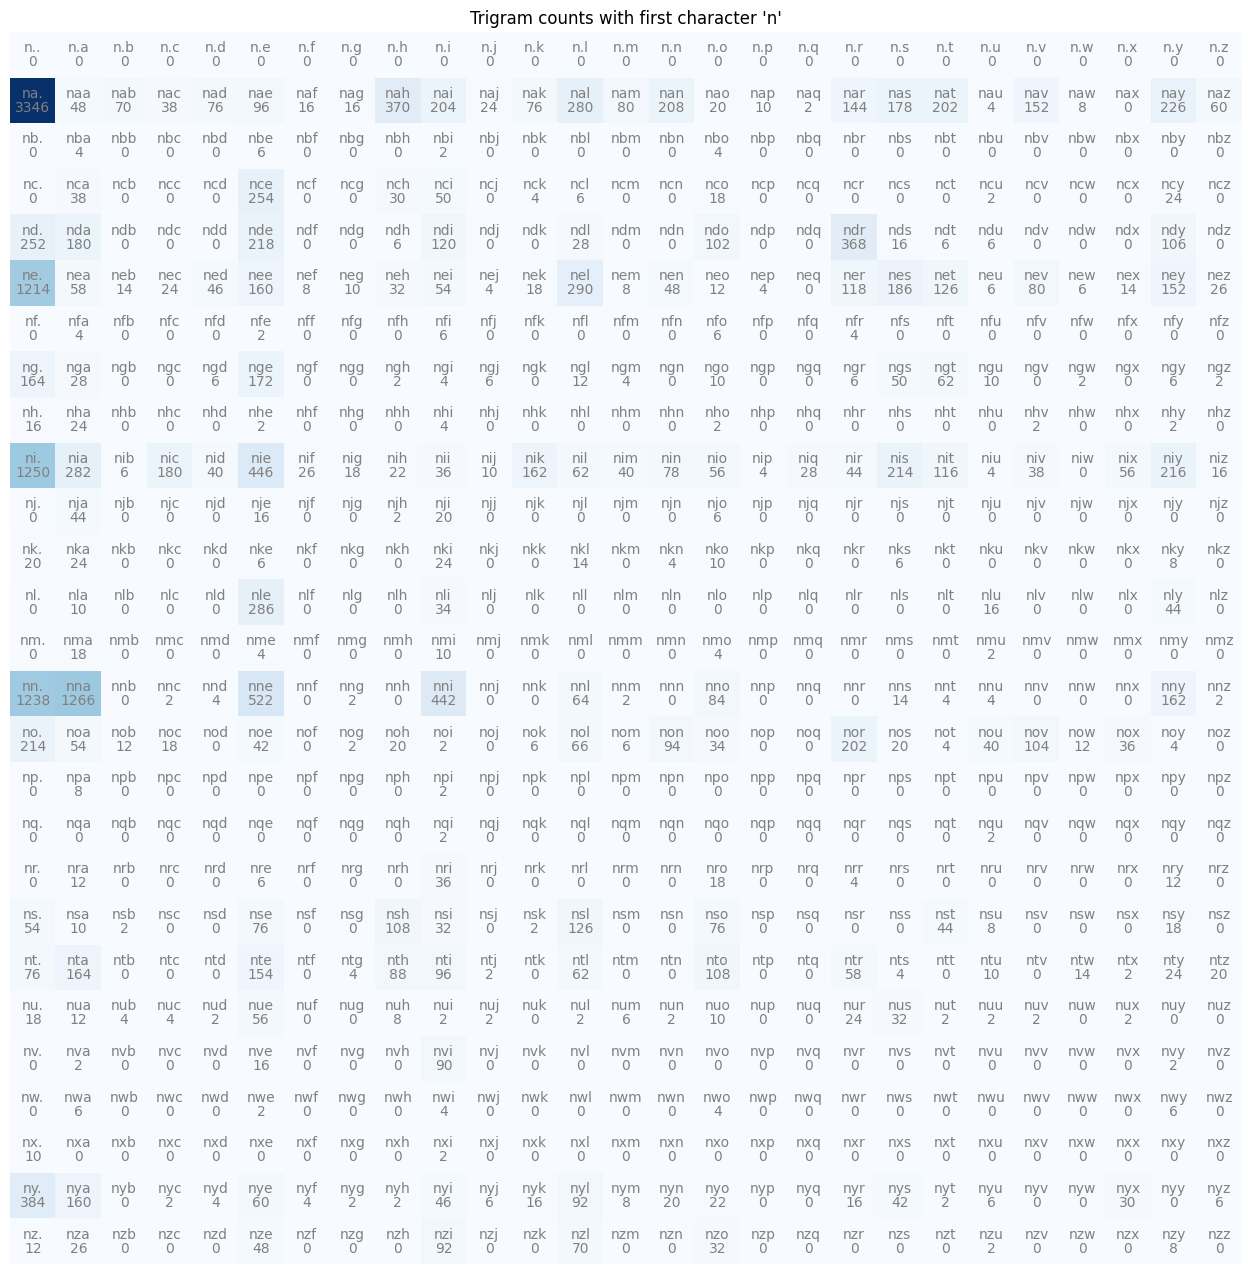

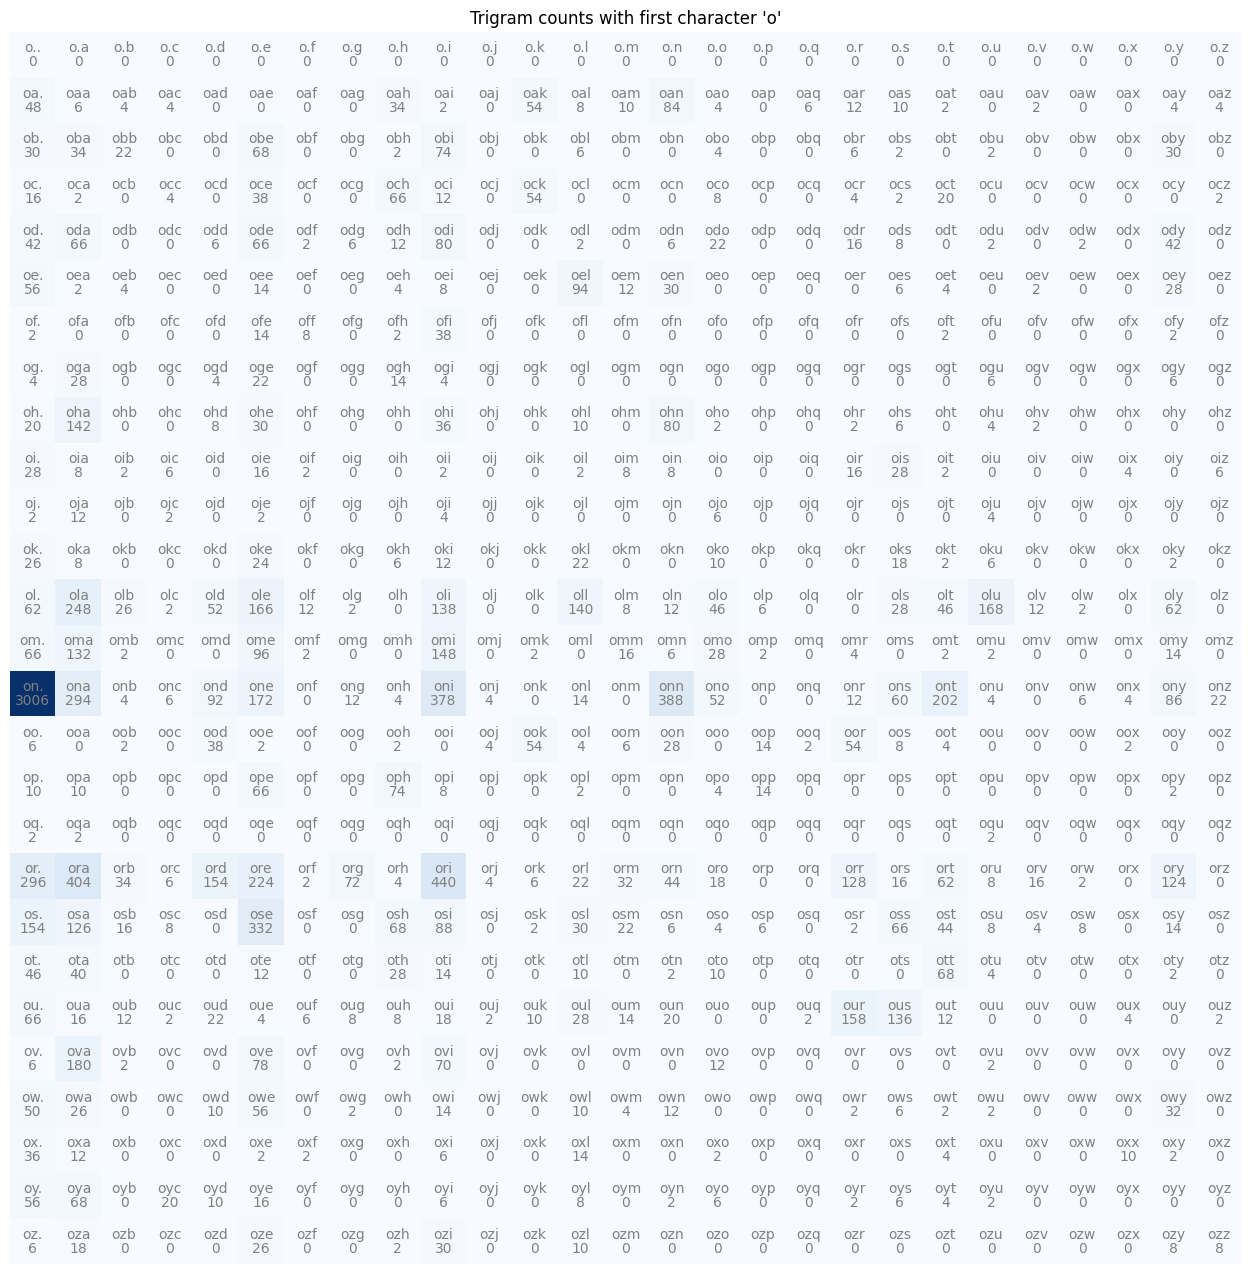

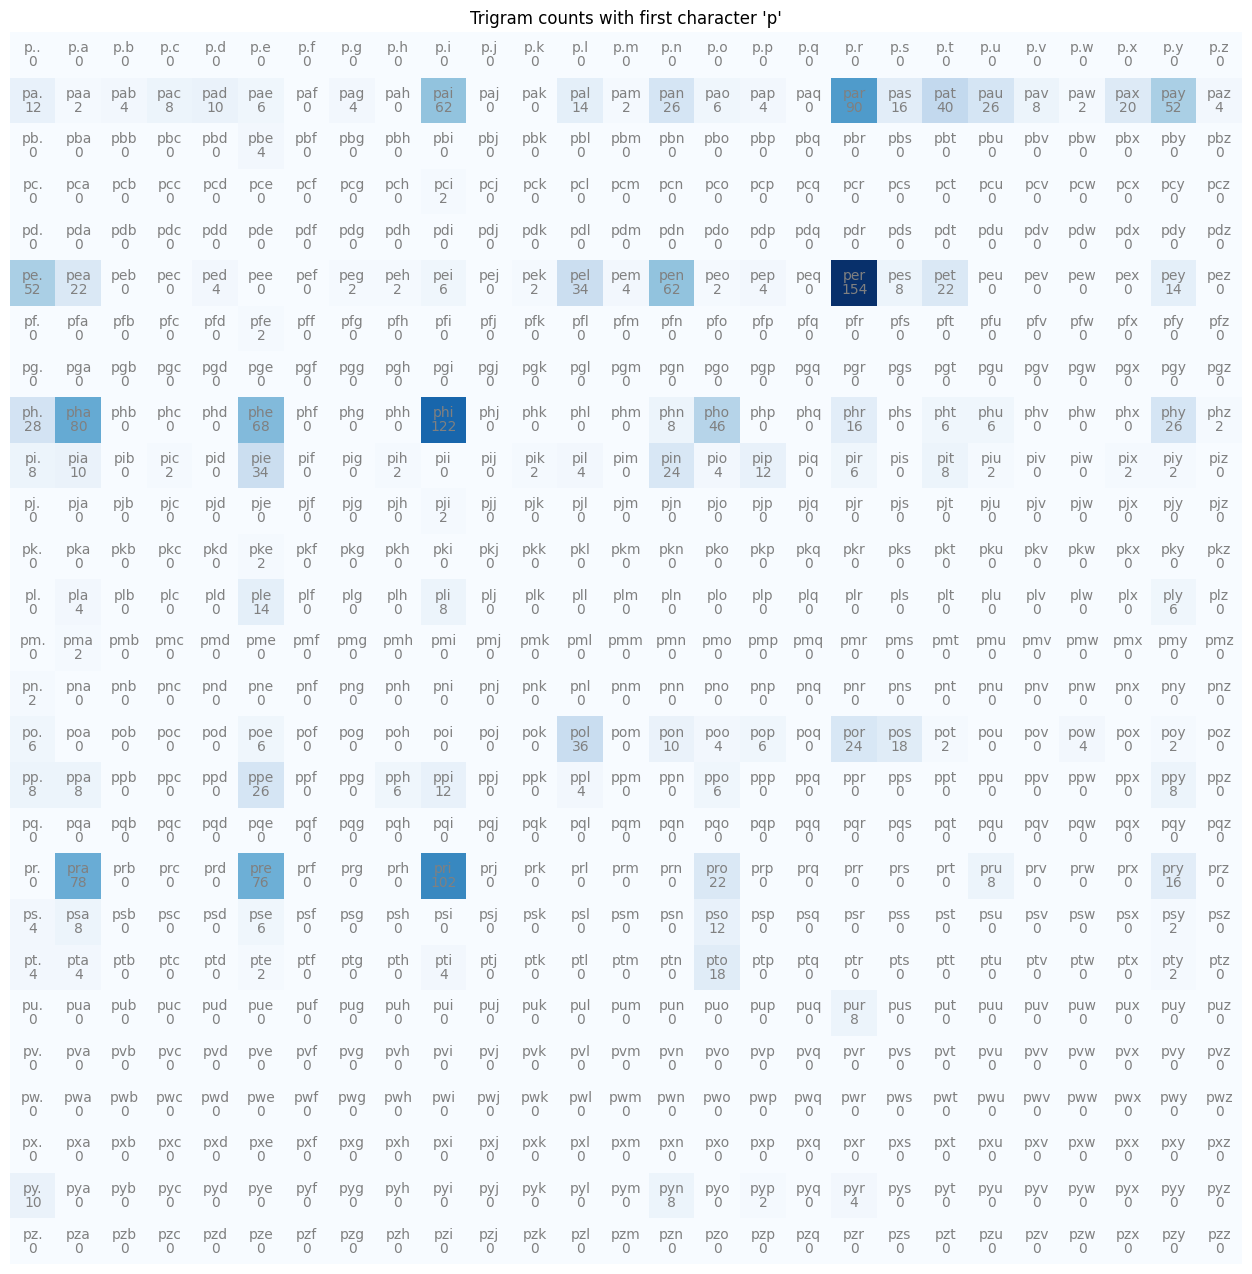

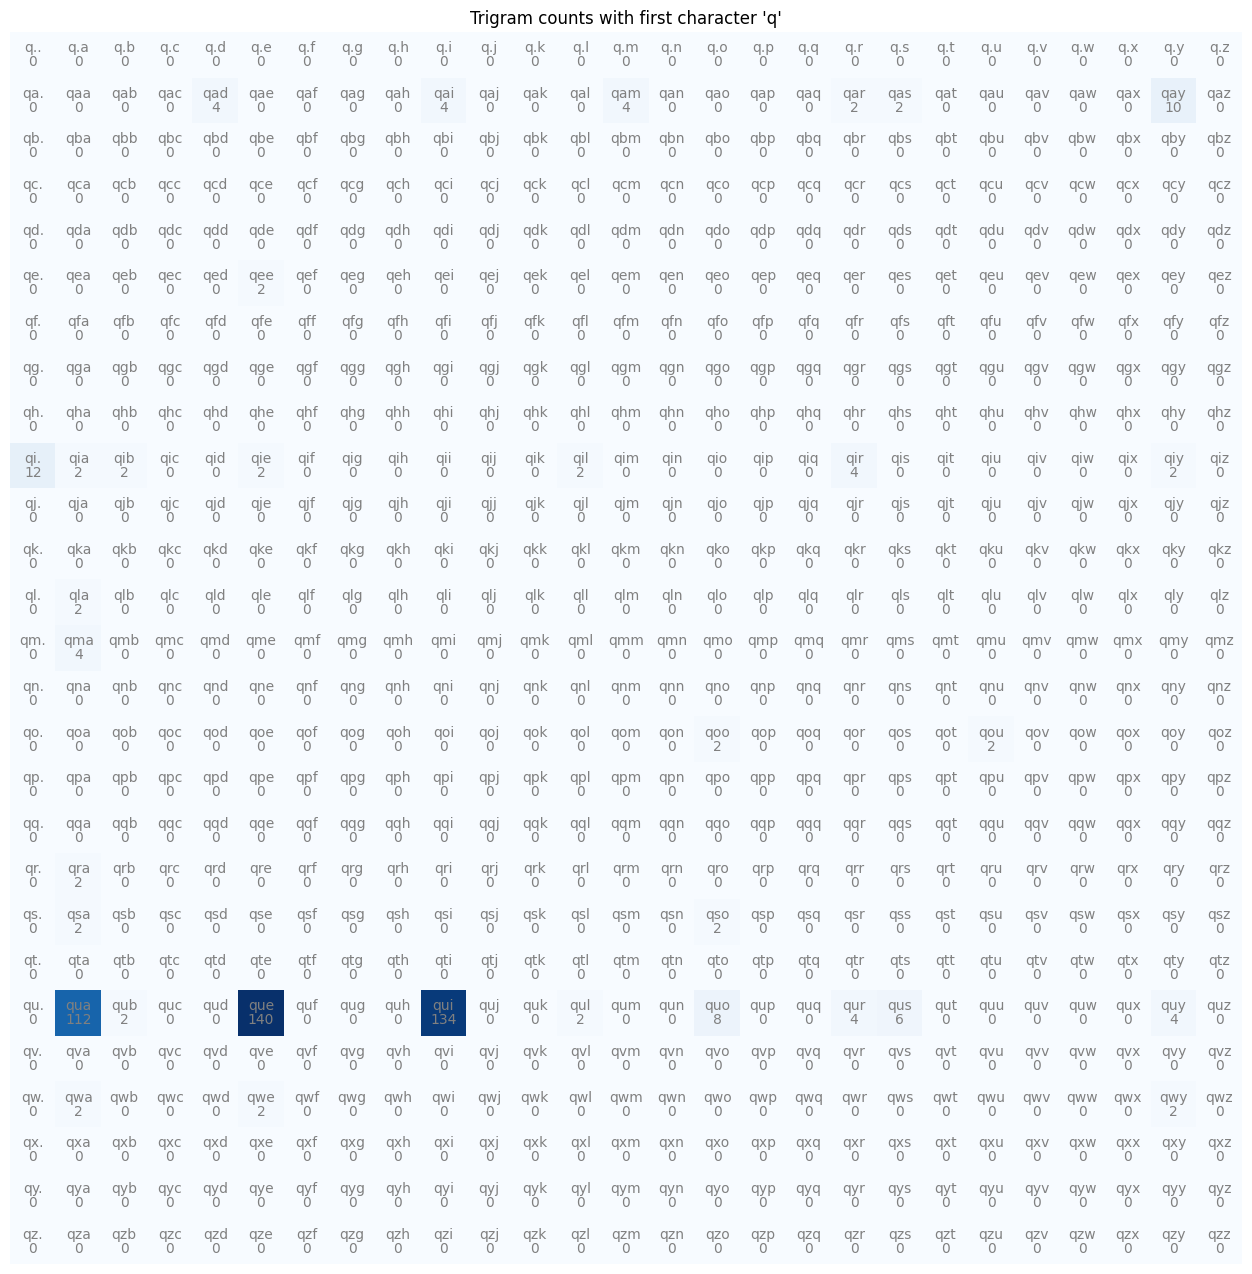

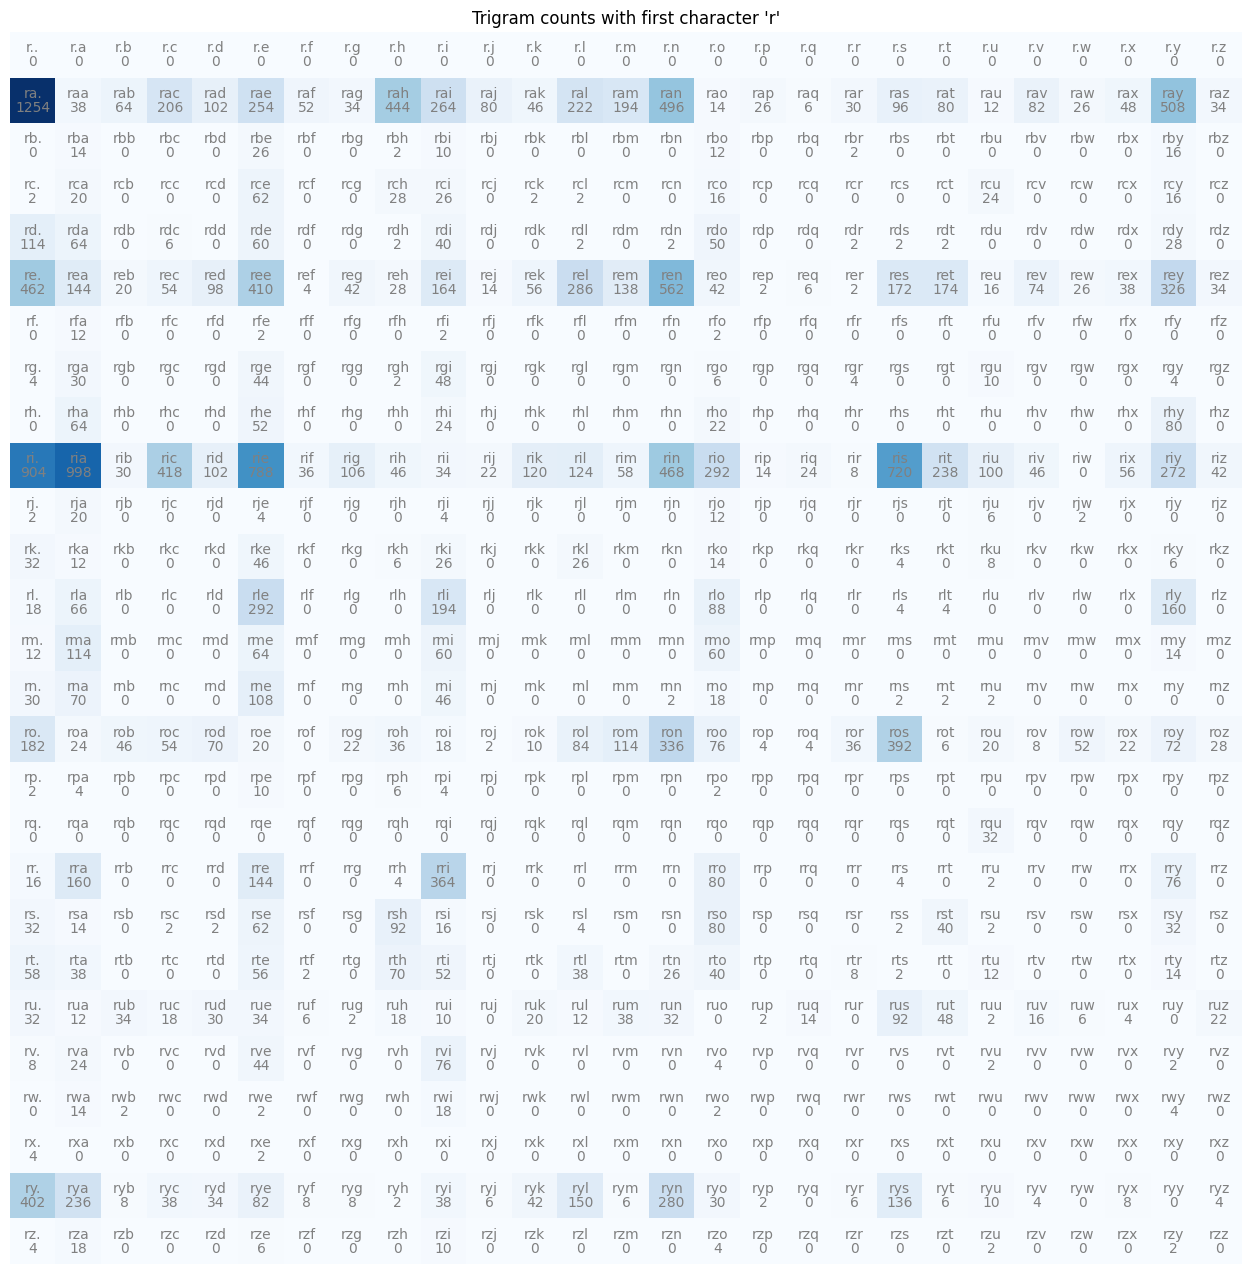

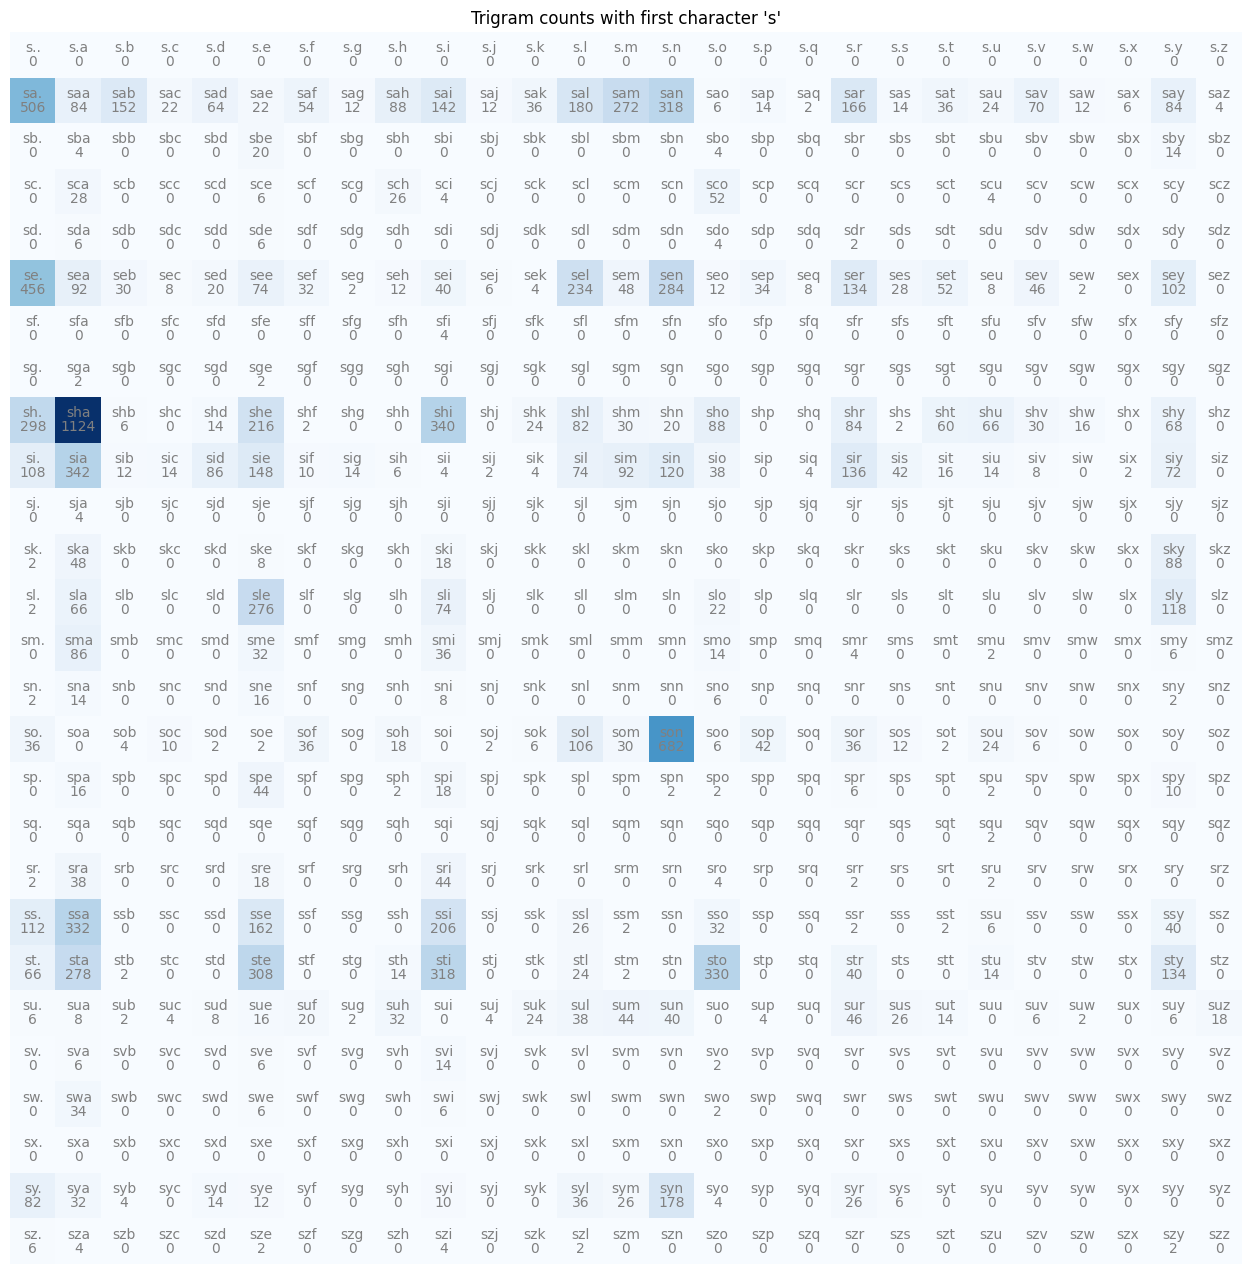

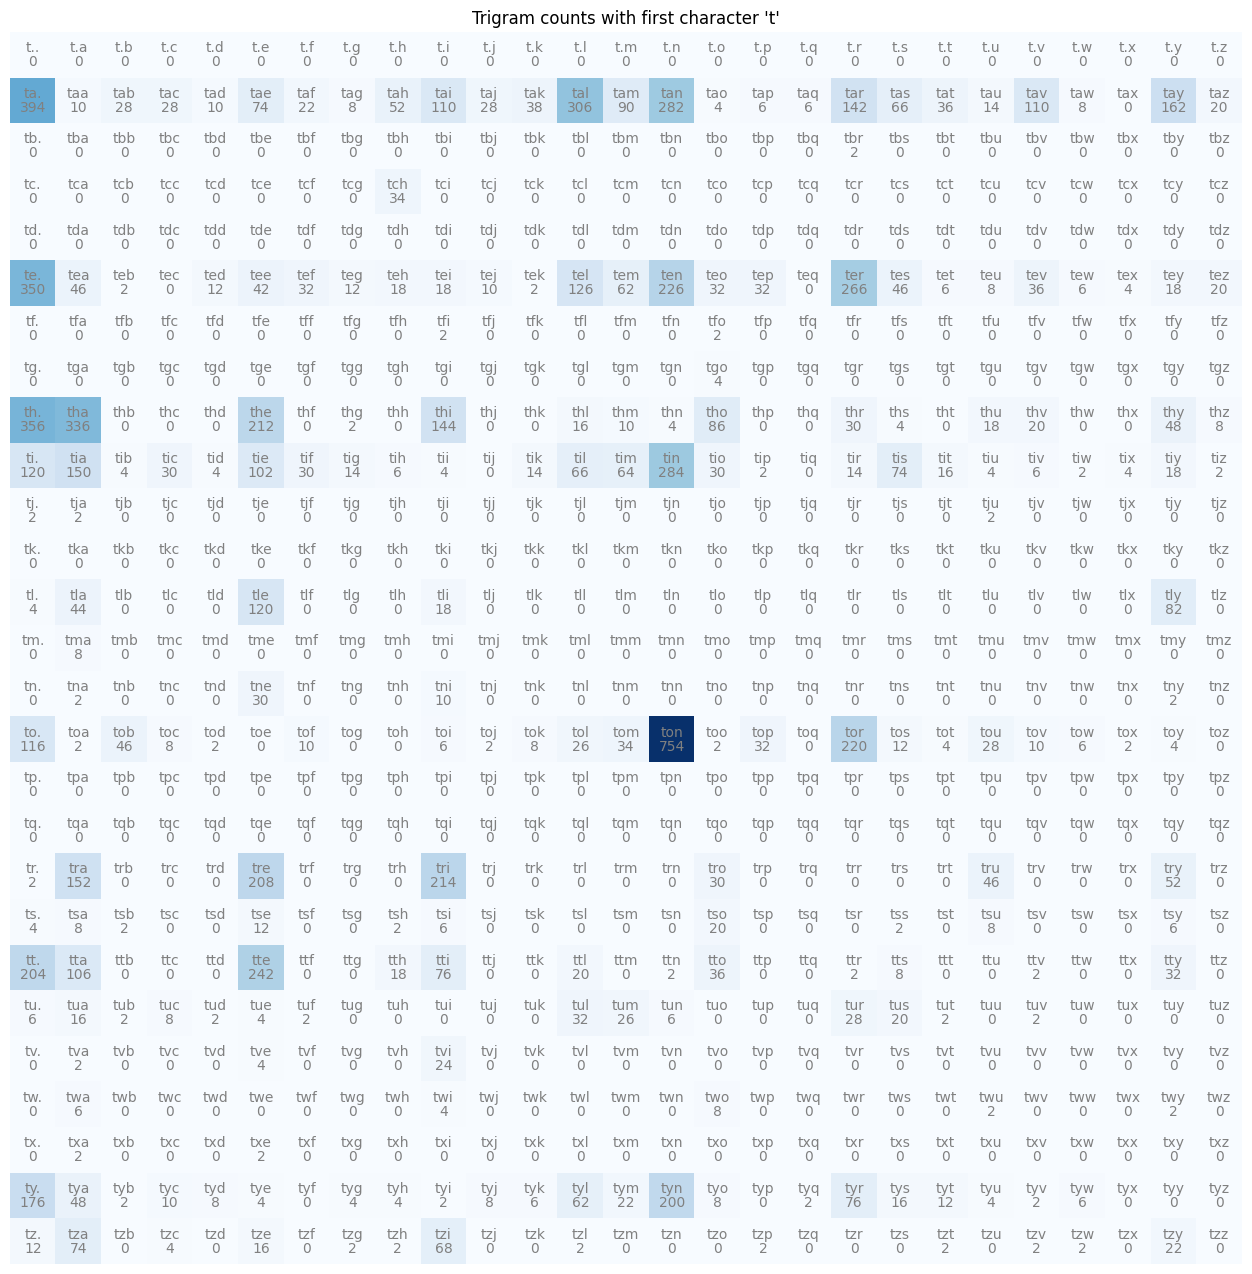

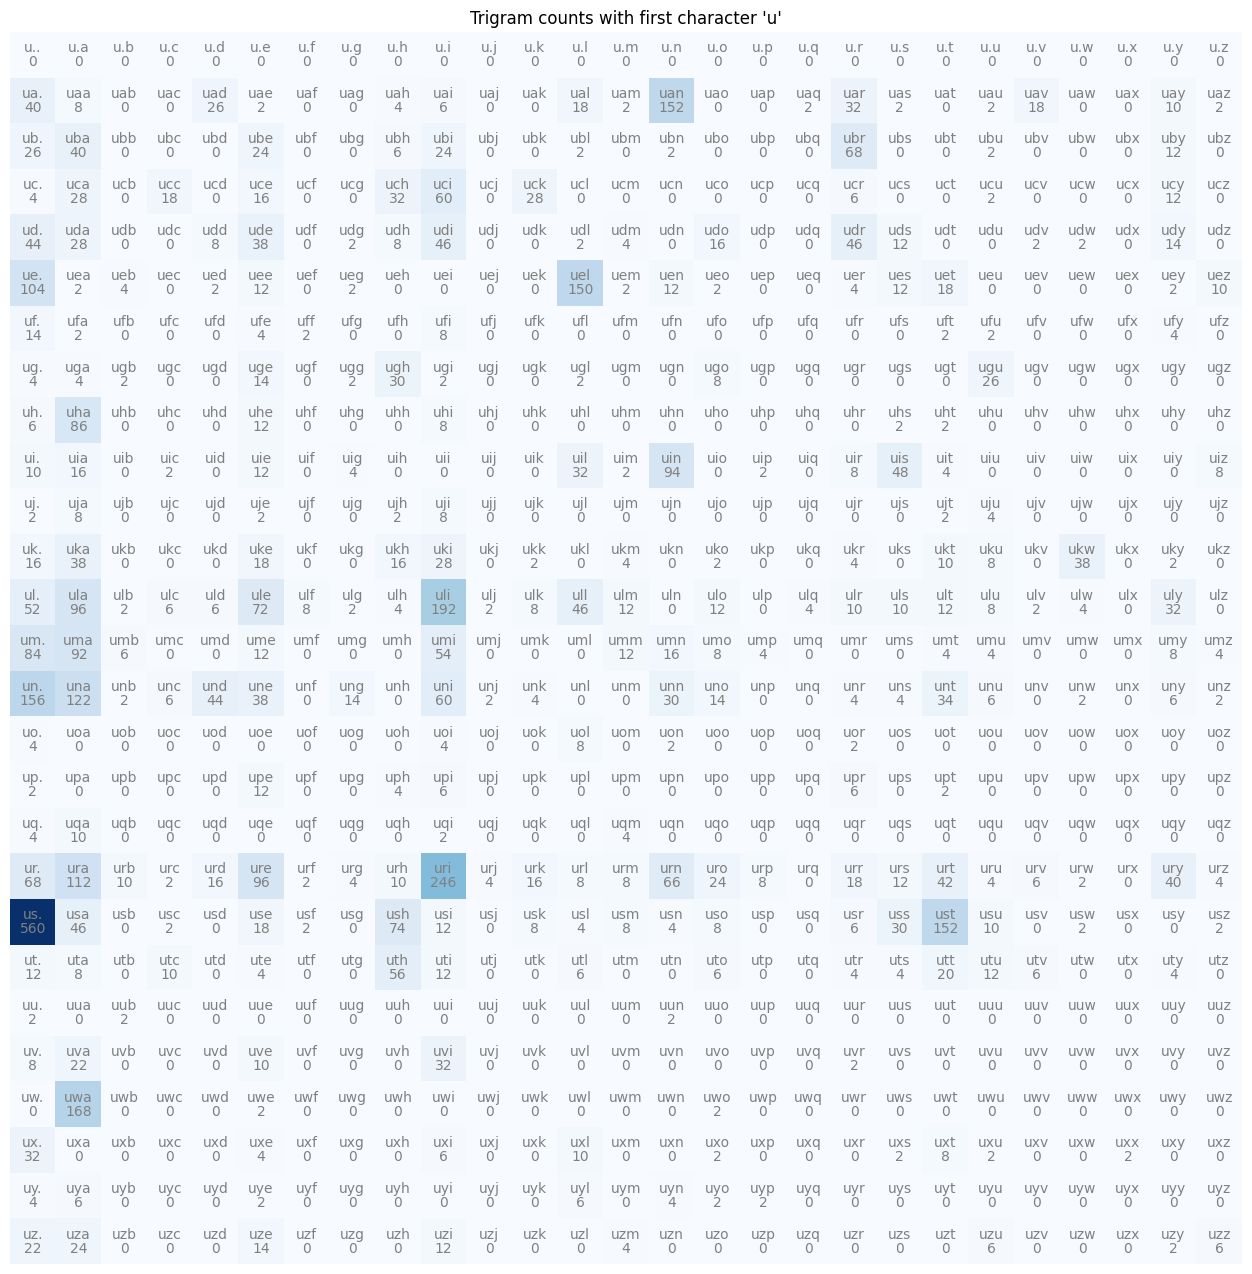

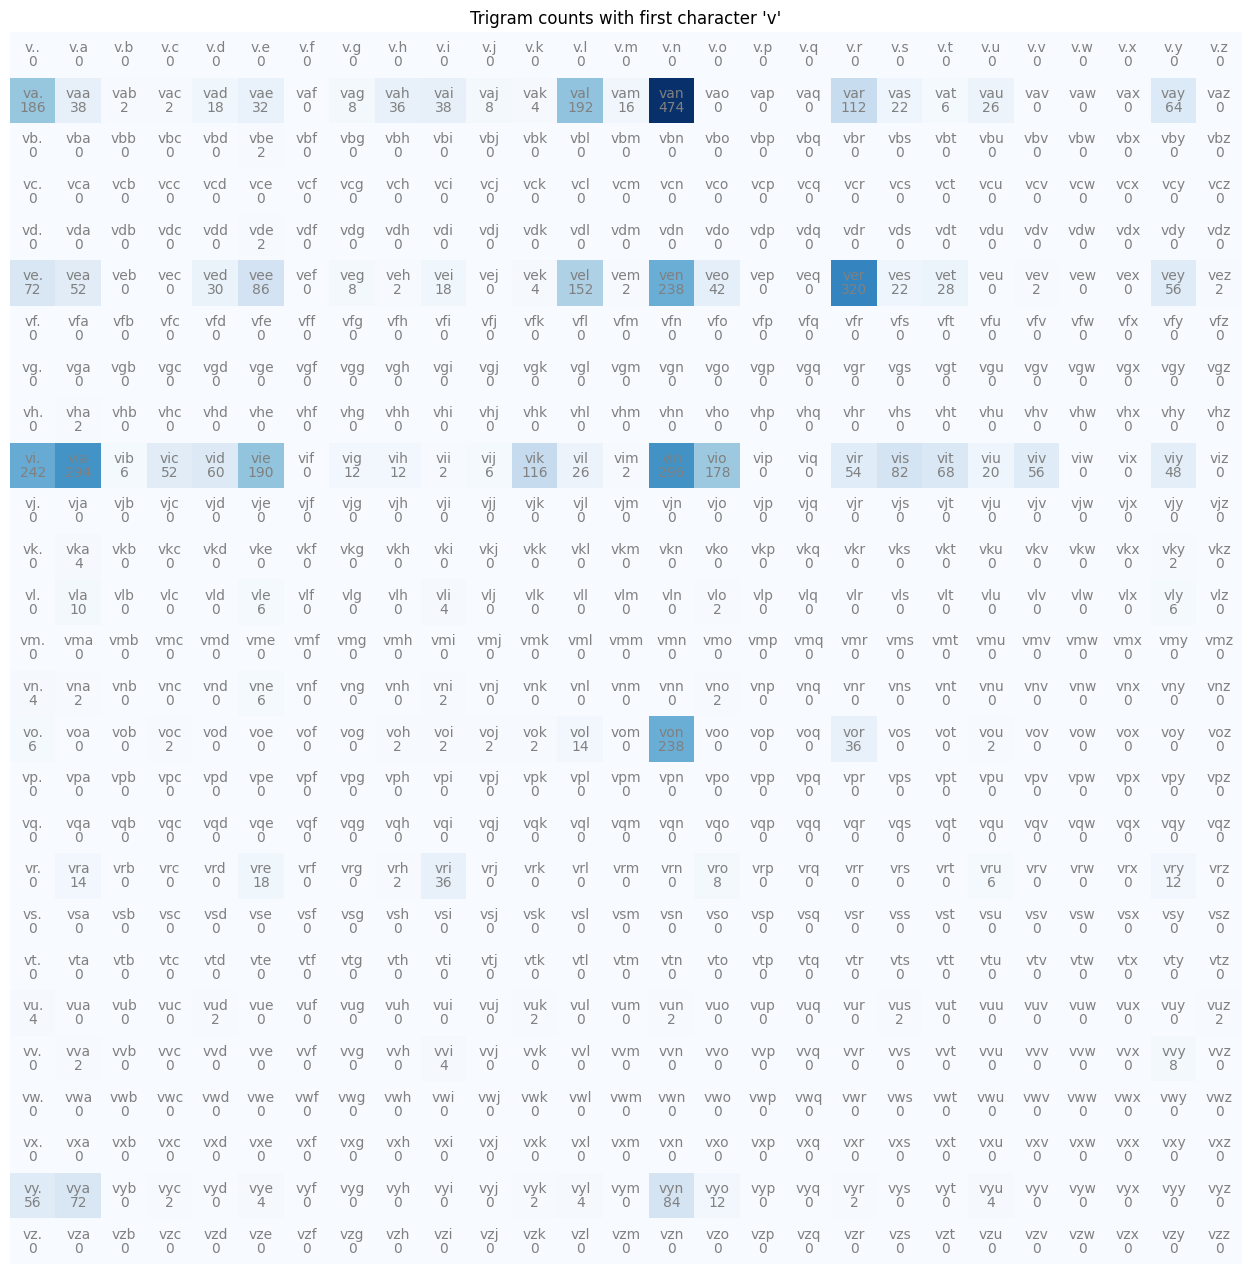

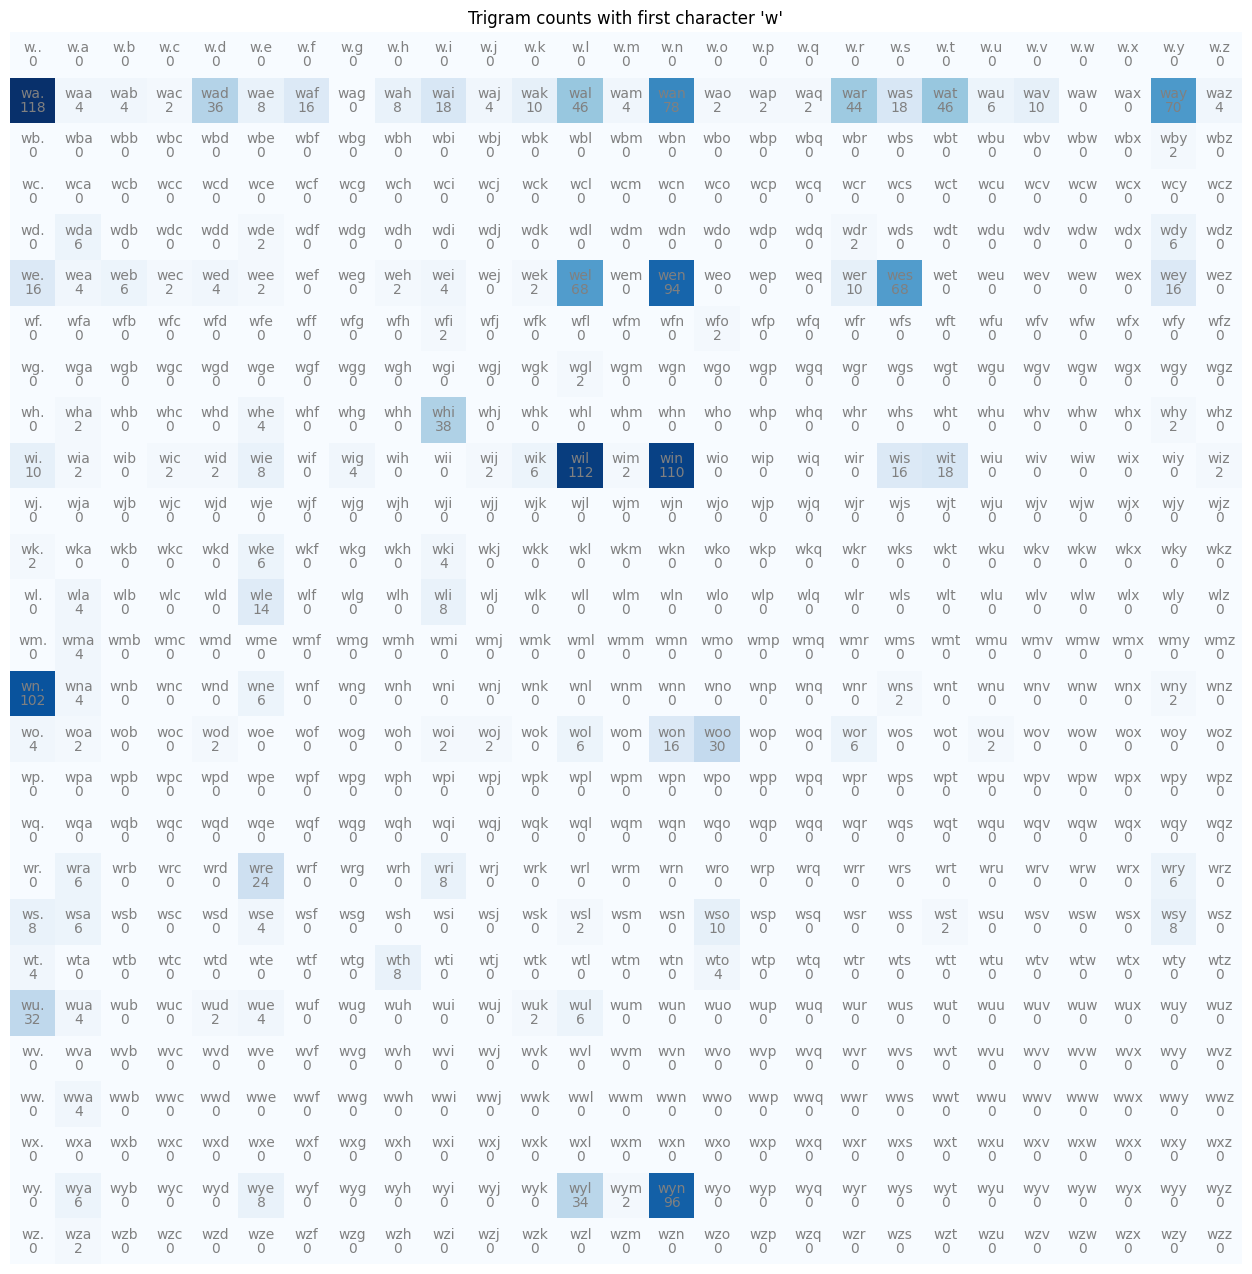

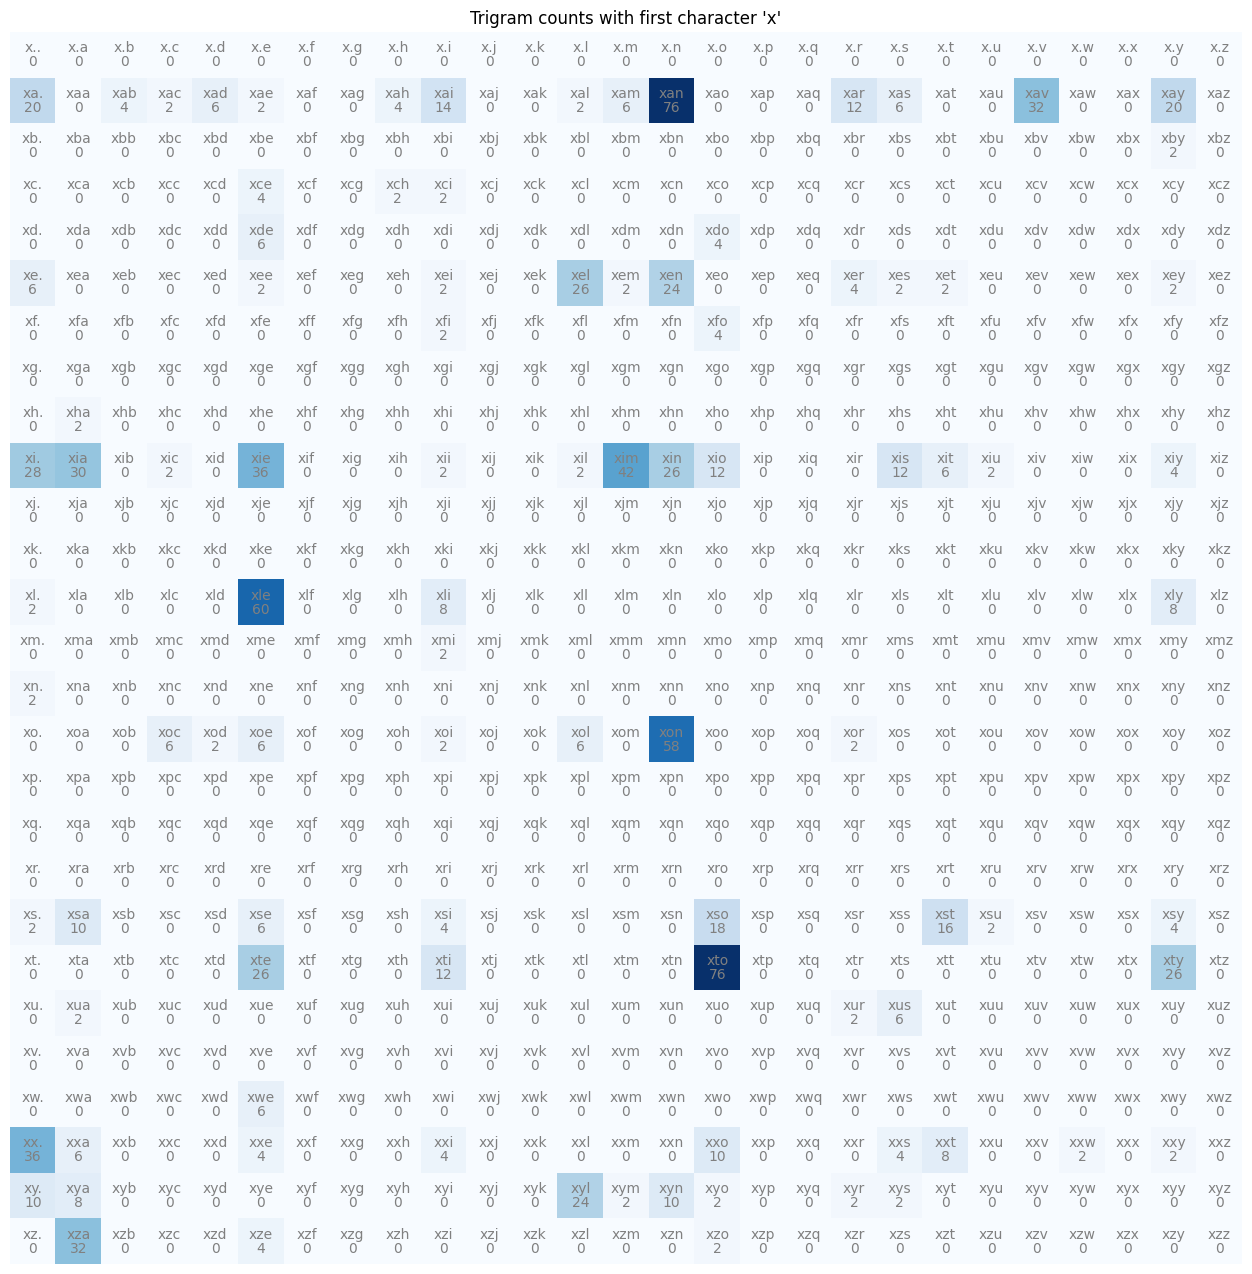

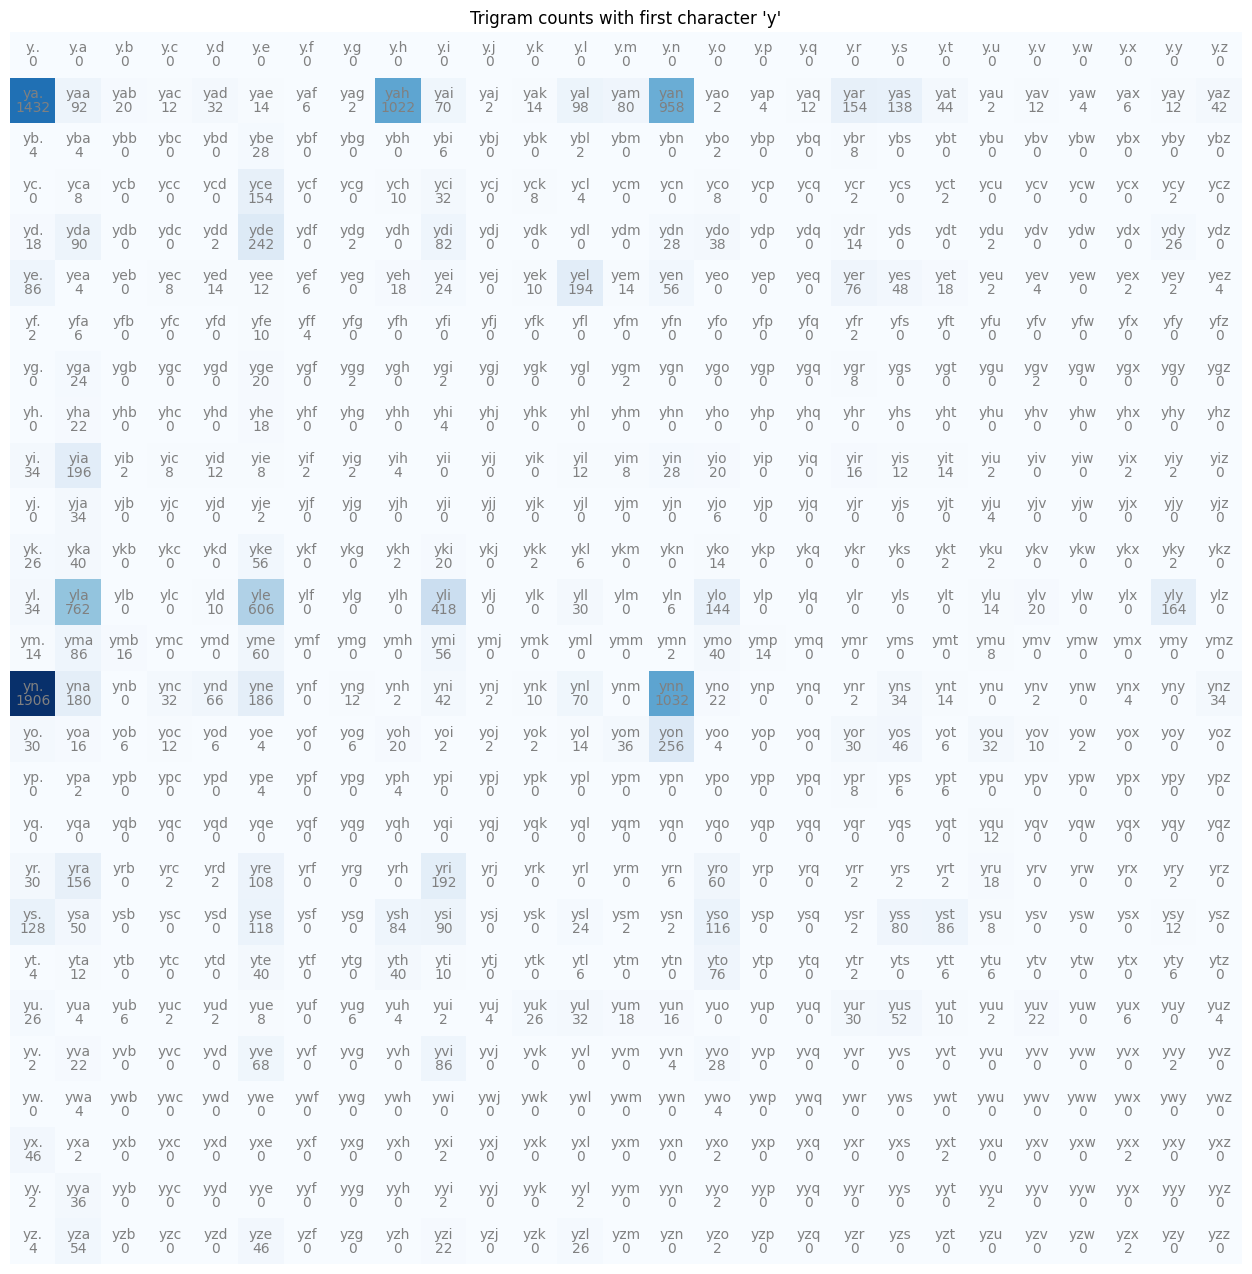

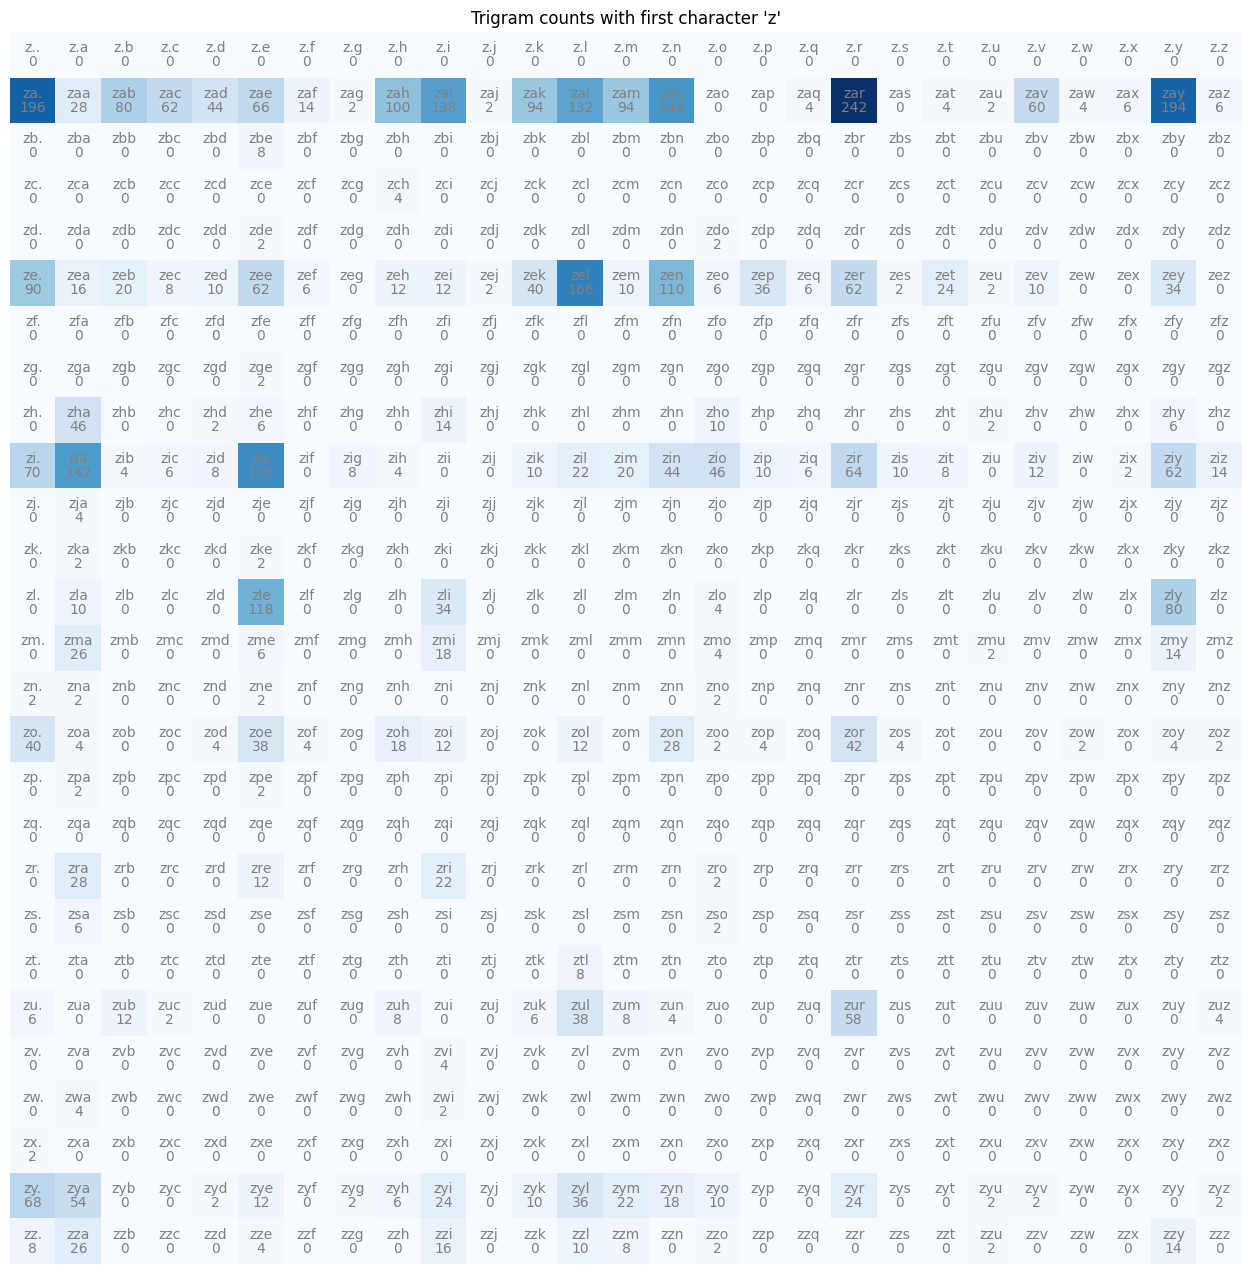

In [ ]:
def plot_trigram_slice(N, fixed_char_index):
    plt.figure(figsize=(16, 16))
    slice_N = N[fixed_char_index]
    plt.imshow(slice_N, cmap='Blues')
    for i in range(27):
        for j in range(27):
            chstr = itos[fixed_char_index] + itos[i] + itos[j]
            plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
            plt.text(j, i, slice_N[i, j].item(), ha="center", va="top", color='gray')
    plt.title(f"Trigram counts with first character '{itos[fixed_char_index]}'")
    plt.axis('off')
    plt.show()
# Visualize slices for each character

for fixed_char_index in range(27):
    plot_trigram_slice(N, fixed_char_index)

In [ ]:
P = (N+1).float()
P /= P.sum(1, keepdims=True)
print(P)

tensor([[[3.7037e-02, 9.8990e-05, 3.8314e-03,  ..., 1.5873e-02,
          7.2833e-04, 2.9412e-03],
         [3.7037e-02, 2.0590e-02, 7.3180e-01,  ..., 4.4444e-01,
          1.2673e-01, 4.5000e-01],
         [3.7037e-02, 1.6828e-02, 3.8314e-03,  ..., 1.5873e-02,
          3.6417e-03, 2.9412e-03],
         ...,
         [3.7037e-02, 5.7414e-03, 3.8314e-03,  ..., 3.1746e-02,
          1.3110e-02, 3.5294e-02],
         [3.7037e-02, 2.4451e-02, 3.8314e-03,  ..., 1.5873e-02,
          7.2833e-04, 8.8235e-03],
         [3.7037e-02, 4.5239e-02, 3.8314e-03,  ..., 1.5873e-02,
          6.7007e-02, 5.8824e-03]],

        [[2.0028e-04, 2.8019e-04, 4.6083e-03,  ..., 1.7857e-02,
          8.3333e-04, 4.0816e-03],
         [8.2115e-03, 2.8019e-04, 2.7650e-02,  ..., 1.7857e-02,
          1.7500e-02, 4.8980e-02],
         [7.4104e-03, 8.1255e-03, 9.6774e-02,  ..., 1.7857e-02,
          1.0833e-02, 4.0816e-03],
         ...,
         [2.4034e-03, 1.6811e-03, 4.6083e-03,  ..., 3.2143e-01,
          5.833

tensor([[3.7037e-02, 3.7037e-02, 3.7037e-02, 3.7037e-02, 3.7037e-02, 3.7037e-02,
         3.7037e-02, 3.7037e-02, 3.7037e-02, 3.7037e-02, 3.7037e-02, 3.7037e-02,
         3.7037e-02, 3.7037e-02, 3.7037e-02, 3.7037e-02, 3.7037e-02, 3.7037e-02,
         3.7037e-02, 3.7037e-02, 3.7037e-02, 3.7037e-02, 3.7037e-02, 3.7037e-02,
         3.7037e-02, 3.7037e-02, 3.7037e-02],
        [2.2538e-04, 4.6879e-02, 4.3047e-02, 7.2121e-03, 8.2714e-02, 1.2621e-02,
         4.9583e-03, 4.0568e-03, 2.0735e-02, 3.4934e-02, 6.3106e-03, 1.7129e-02,
         1.4266e-01, 8.6770e-02, 1.4064e-01, 2.4792e-03, 4.0568e-03, 2.2538e-03,
         1.0886e-01, 4.3949e-02, 1.6453e-02, 3.4483e-02, 5.4992e-02, 1.5776e-03,
         6.3106e-03, 3.9216e-02, 3.4483e-02],
        [7.5019e-04, 1.2753e-01, 7.5019e-04, 7.5019e-04, 7.5019e-04, 1.9055e-01,
         7.5019e-04, 7.5019e-04, 7.5019e-03, 3.1508e-02, 1.5004e-03, 7.5019e-04,
         6.4516e-02, 7.5019e-04, 7.5019e-04, 5.8515e-02, 7.5019e-04, 7.5019e-04,
         4.8537e-

In [ ]:
g = torch.Generator().manual_seed(2147483647)
for i in range(10):
  out = []
  ix = 0
  while True:
    p = P[ix][ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

RuntimeError: a Tensor with 27 elements cannot be converted to Scalar

In [ ]:
p[0]

tensor([3.7037e-02, 9.8990e-05, 3.8314e-03, 5.9172e-03, 1.9194e-03, 2.4295e-04,
        1.4085e-02, 1.5385e-02, 6.4350e-04, 3.5261e-04, 1.2987e-02, 5.3191e-03,
        6.2696e-04, 1.2255e-03, 1.1990e-03, 3.8081e-04, 1.3514e-02, 2.6316e-02,
        4.4723e-04, 1.9685e-03, 3.3784e-03, 7.3638e-04, 2.0040e-03, 8.4034e-03,
        1.5873e-02, 7.2833e-04, 2.9412e-03])

In [ ]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p[0], num_samples=1, replacement=True, generator=g).item()
print(ix)
itos[ix]

10


'j'

In [ ]:
j = 1.0

In [ ]:
j/27

0.037037037037037035